# Heart Disease Prediction:
## by Cemile Senem Arabaci

### This analysis is to predict if a patient has heart disease or not by using the given variables for the patient.  

## Importing the libraries we need 

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('mode.chained_assignment', None)

#!pip install xgboost
#!pip install tensorflow

from scipy.stats import skew
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, plot_roc_curve, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler

import plotly.graph_objects as go
import tensorflow as tf

import plotly.express as px

In [3]:
df = pd.read_csv("data/heart_disease_dataset.csv")

## Understanding variables given in the dataset

Heart attack (myocardial infarction) happens when one or more areas of the heart muscle don't get enough oxygen. This happens when blood flow to the heart muscle is blocked.


According to Mayo Clinic, men age 45 and older and women age 55 and older are more likely to have a heart attack than are younger men and women.

High blood pressure is a common factor for stroke and major risk factor for heart attacks according to Heart and Stroke Foundation of Canada. We can say resting blood pressure should also tell us similar trends compared to heart attacks.

According to BMJ global health men are more likely to develop heart disease than women. 

Among chest pains, there are typical angina means patient shows 3 types of heart attack symptoms. Atypical angina shows 2 and non-anginal pain shows 1 symptom among 3 types of heart attack symptoms. Asymptomatic has nearly no symptoms or not well recognizable. Therefore, we can expect our data to show patients with heart disease at typical angina. 

Bad cholesterol (LDL) correlates with heart disease since it is one of the reasons for artery-cloggying plague according to WebMD. 

Resting electrocardiographic results can be assessed as Left
ventricular hypertrophy can have heart disease and it is less likely for ST-T wave normality according to Huwez FU, Pringle SD, Macfarlane PW. Variable patterns of ST-T abnormalities in patients with left ventricular hypertrophy and normal coronary arteries. Br Heart J. 1992 Apr;67(4):304-7. doi: 10.1136/hrt.67.4.304. PMID: 1389704; PMCID: PMC1024837.

Fasting blood sugar level 100-125 mg/dl shows heart disease risk increase and here we categorize it if it is higher than 120 or not. 

The maximum heart rate increases during heart attack according to a medically review article by healthline media. 

According to Heart and Stroke Foundation of Canada, Angina will sometimes cause dizziness, paleness, weakness. Heart attack symptoms often include nausea or throwing up, weakness, tiredness or sweating.









### Approach

### Data Summary

Our dataset is small in size therefore we will use only Machine Learning models to test and train our dataset and no Neural Networks (deeplearning algorithms). 

In [4]:
from tabulate import tabulate
 
# assign data
mydata = [["Age","Age of the patient"],
    ["Sex" , "1 is male , 0 is female"],
    ["Output", "1 is heart attack, 0 is normal"],
    ["cp", "Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 =Non-anginal Pain, 3 =Asymptomatic "],
      ["trtbps", "Resting blood pressure"],["chol","Cholestoral in mg/dl fetched via BMI sensor"],["restecg","Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy"],["fbs","(fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False"],["thalachh","Maximum heart rate achieved"],["oldpeak","previous peak"],["slp", "slope ranges from 1-6 (found below)"],["caa", "number of major vessels"],["thall", "Thalium Stress Test result ~ (0,3)"],["exng", "Exercise induced angina ~ 1 = Yes, 0 = No"],[ "o2Saturation" ,"Blood oxygen saturation (%)"]
]
 
# create header
head = ["Attribute", "Description"]
 
# display table
print(tabulate(mydata, headers=head))

Attribute     Description
------------  ------------------------------------------------------------------------------------------------------------
Age           Age of the patient
Sex           1 is male , 0 is female
Output        1 is heart attack, 0 is normal
cp            Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 =Non-anginal Pain, 3 =Asymptomatic
trtbps        Resting blood pressure
chol          Cholestoral in mg/dl fetched via BMI sensor
restecg       Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
fbs           (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
thalachh      Maximum heart rate achieved
oldpeak       previous peak
slp           slope ranges from 1-6 (found below)
caa           number of major vessels
thall         Thalium Stress Test result ~ (0,3)
exng          Exercise induced angina ~ 1 = Yes, 0 = No
o2Saturation  Blood oxygen saturation (%)


#### There is none of the feature values on rows after row 303 present

In [5]:
df

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
0     63.0  1.0  3.0   145.0  233.0  1.0      0.0     150.0   0.0      2.3   
1     37.0  1.0  2.0   130.0  250.0  0.0      1.0     187.0   0.0      3.5   
2     41.0  0.0  1.0   130.0  204.0  0.0      0.0     172.0   0.0      1.4   
3     56.0  1.0  1.0   120.0  236.0  0.0      1.0     178.0   0.0      0.8   
4     57.0  0.0  0.0   120.0  354.0  0.0      1.0     163.0   1.0      0.6   
...    ...  ...  ...     ...    ...  ...      ...       ...   ...      ...   
3581   NaN  NaN  NaN     NaN    NaN  NaN      NaN       NaN   NaN      NaN   
3582   NaN  NaN  NaN     NaN    NaN  NaN      NaN       NaN   NaN      NaN   
3583   NaN  NaN  NaN     NaN    NaN  NaN      NaN       NaN   NaN      NaN   
3584   NaN  NaN  NaN     NaN    NaN  NaN      NaN       NaN   NaN      NaN   
3585   NaN  NaN  NaN     NaN    NaN  NaN      NaN       NaN   NaN      NaN   

      slp  caa  thall  output  o2Saturation  
0     0.0  0.0    1.0     1.0          98.6  
1     0.0  0.0    2.0     1.0          98.6  
2     2.0  0.0    2.0     1.0          98.6  
3     2.0  0.0    2.0     1.0          98.6  
4     2.0  0.0    2.0     1.0          98.1  
...   ...  ...    ...     ...           ...  
3581  NaN  NaN    NaN     NaN          98.6  
3582  NaN  NaN    NaN     NaN          98.6  
3583  NaN  NaN    NaN     NaN          98.6  
3584  NaN  NaN    NaN     NaN          98.6  
3585  NaN  NaN    NaN     NaN          98.6  

[3586 rows x 15 columns]

#### Preview the info of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    float64
 1   sex           303 non-null    float64
 2   cp            303 non-null    float64
 3   trtbps        303 non-null    float64
 4   chol          303 non-null    float64
 5   fbs           303 non-null    float64
 6   restecg       303 non-null    float64
 7   thalachh      303 non-null    float64
 8   exng          303 non-null    float64
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    float64
 11  caa           303 non-null    float64
 12  thall         303 non-null    float64
 13  output        303 non-null    float64
 14  o2Saturation  3586 non-null   float64
dtypes: float64(15)
memory usage: 420.4 KB


In [7]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  o2Saturation  
count  303.000000  303.000000   3586.000000  
mean     2.313531    0.544554     98.239375  
std      0.612277    0.498835      0.726260  
min      0.000000    0.000000     96.500000  
25%      2.000000    0.000000     97.600000  
50%      2.000000    1.000000     98.600000  
75%      3.000000    1.000000     98.600000  
max      3.000000    1.000000     99.600000

In [8]:
3586-303

3283

#### There are 3283 null instances. We observe that only 303 rows have only output variables and no feature variable. Since the feature variables are completely absent, we will drop these cases for further analysis. The dataset comprises 303 examples (patients).

##### Drop the empty rows on the table.

In [9]:
df = df.dropna(axis=0)

In [10]:
df

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
0    63.0  1.0  3.0   145.0  233.0  1.0      0.0     150.0   0.0      2.3   
1    37.0  1.0  2.0   130.0  250.0  0.0      1.0     187.0   0.0      3.5   
2    41.0  0.0  1.0   130.0  204.0  0.0      0.0     172.0   0.0      1.4   
3    56.0  1.0  1.0   120.0  236.0  0.0      1.0     178.0   0.0      0.8   
4    57.0  0.0  0.0   120.0  354.0  0.0      1.0     163.0   1.0      0.6   
..    ...  ...  ...     ...    ...  ...      ...       ...   ...      ...   
298  57.0  0.0  0.0   140.0  241.0  0.0      1.0     123.0   1.0      0.2   
299  45.0  1.0  3.0   110.0  264.0  0.0      1.0     132.0   0.0      1.2   
300  68.0  1.0  0.0   144.0  193.0  1.0      1.0     141.0   0.0      3.4   
301  57.0  1.0  0.0   130.0  131.0  0.0      1.0     115.0   1.0      1.2   
302  57.0  0.0  1.0   130.0  236.0  0.0      0.0     174.0   0.0      0.0   

     slp  caa  thall  output  o2Saturation  
0    0.0  0.0    1.0     1.0          98.6  
1    0.0  0.0    2.0     1.0          98.6  
2    2.0  0.0    2.0     1.0          98.6  
3    2.0  0.0    2.0     1.0          98.6  
4    2.0  0.0    2.0     1.0          98.1  
..   ...  ...    ...     ...           ...  
298  1.0  0.0    3.0     0.0          97.5  
299  1.0  0.0    3.0     0.0          97.5  
300  1.0  2.0    3.0     0.0          97.5  
301  1.0  1.0    3.0     0.0          97.5  
302  1.0  1.0    2.0     0.0          97.5  

[303 rows x 15 columns]

##### Checking if there is still any missing value.

In [11]:
df.isnull().sum()

age             0
sex             0
cp              0
trtbps          0
chol            0
fbs             0
restecg         0
thalachh        0
exng            0
oldpeak         0
slp             0
caa             0
thall           0
output          0
o2Saturation    0
dtype: int64

### Data Exploration 

#### Understanding output variable: From the chart, we observe that this is almost balanced dataset.Therefore, it can be fairly comparable with other features suc as features such as colestrol, resting blood pressure, age, ...

In [12]:
#@title ###Heart Disease Output Value Distribution in a Pie Chart
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Heart Disease Distribution of Values']
values = df['output'].value_counts()/df['output'].shape[0]

fig0 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig0.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig0.update_layout(
    title_text="Heart Disease",
    title_font_color="black",
    legend_title_font_color="yellow",
    #paper_bgcolor="black",
    #plot_bgcolor='black',
    font_color="black",
)
fig0.show()

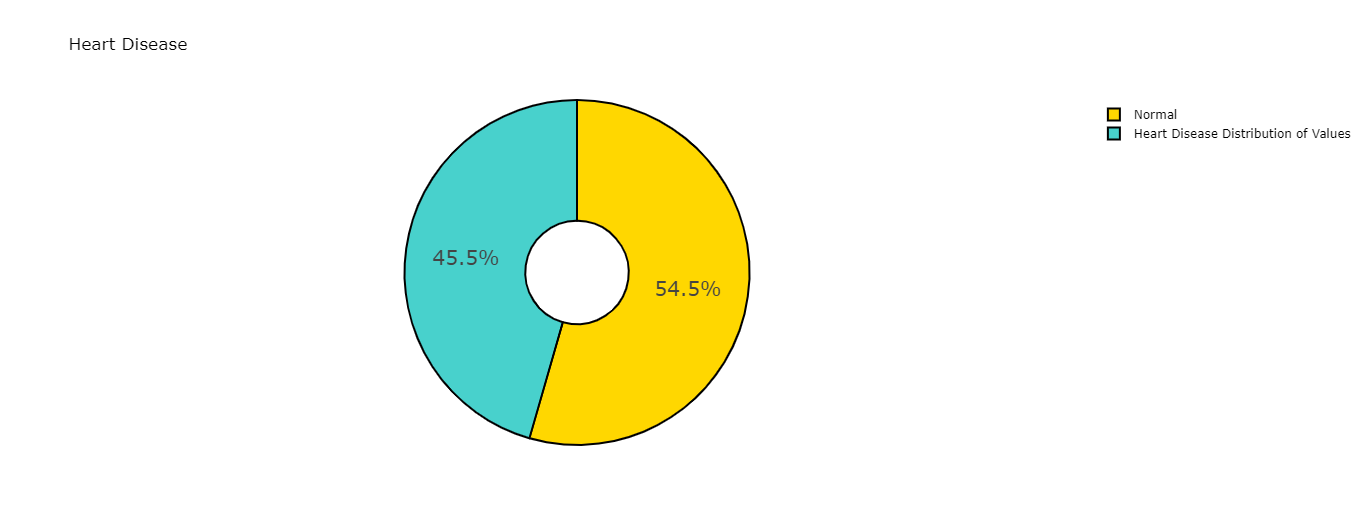


#### Now, let's understand the feature variables: 
#### There are 8 categorical features and 5 continuous features 
#### Let's first analyze the continuous feature variables.



### Normal and Heart Attack Chance distributed on Continuous features

Reminder: Output 0 means normal health and 1 means heart disease. 

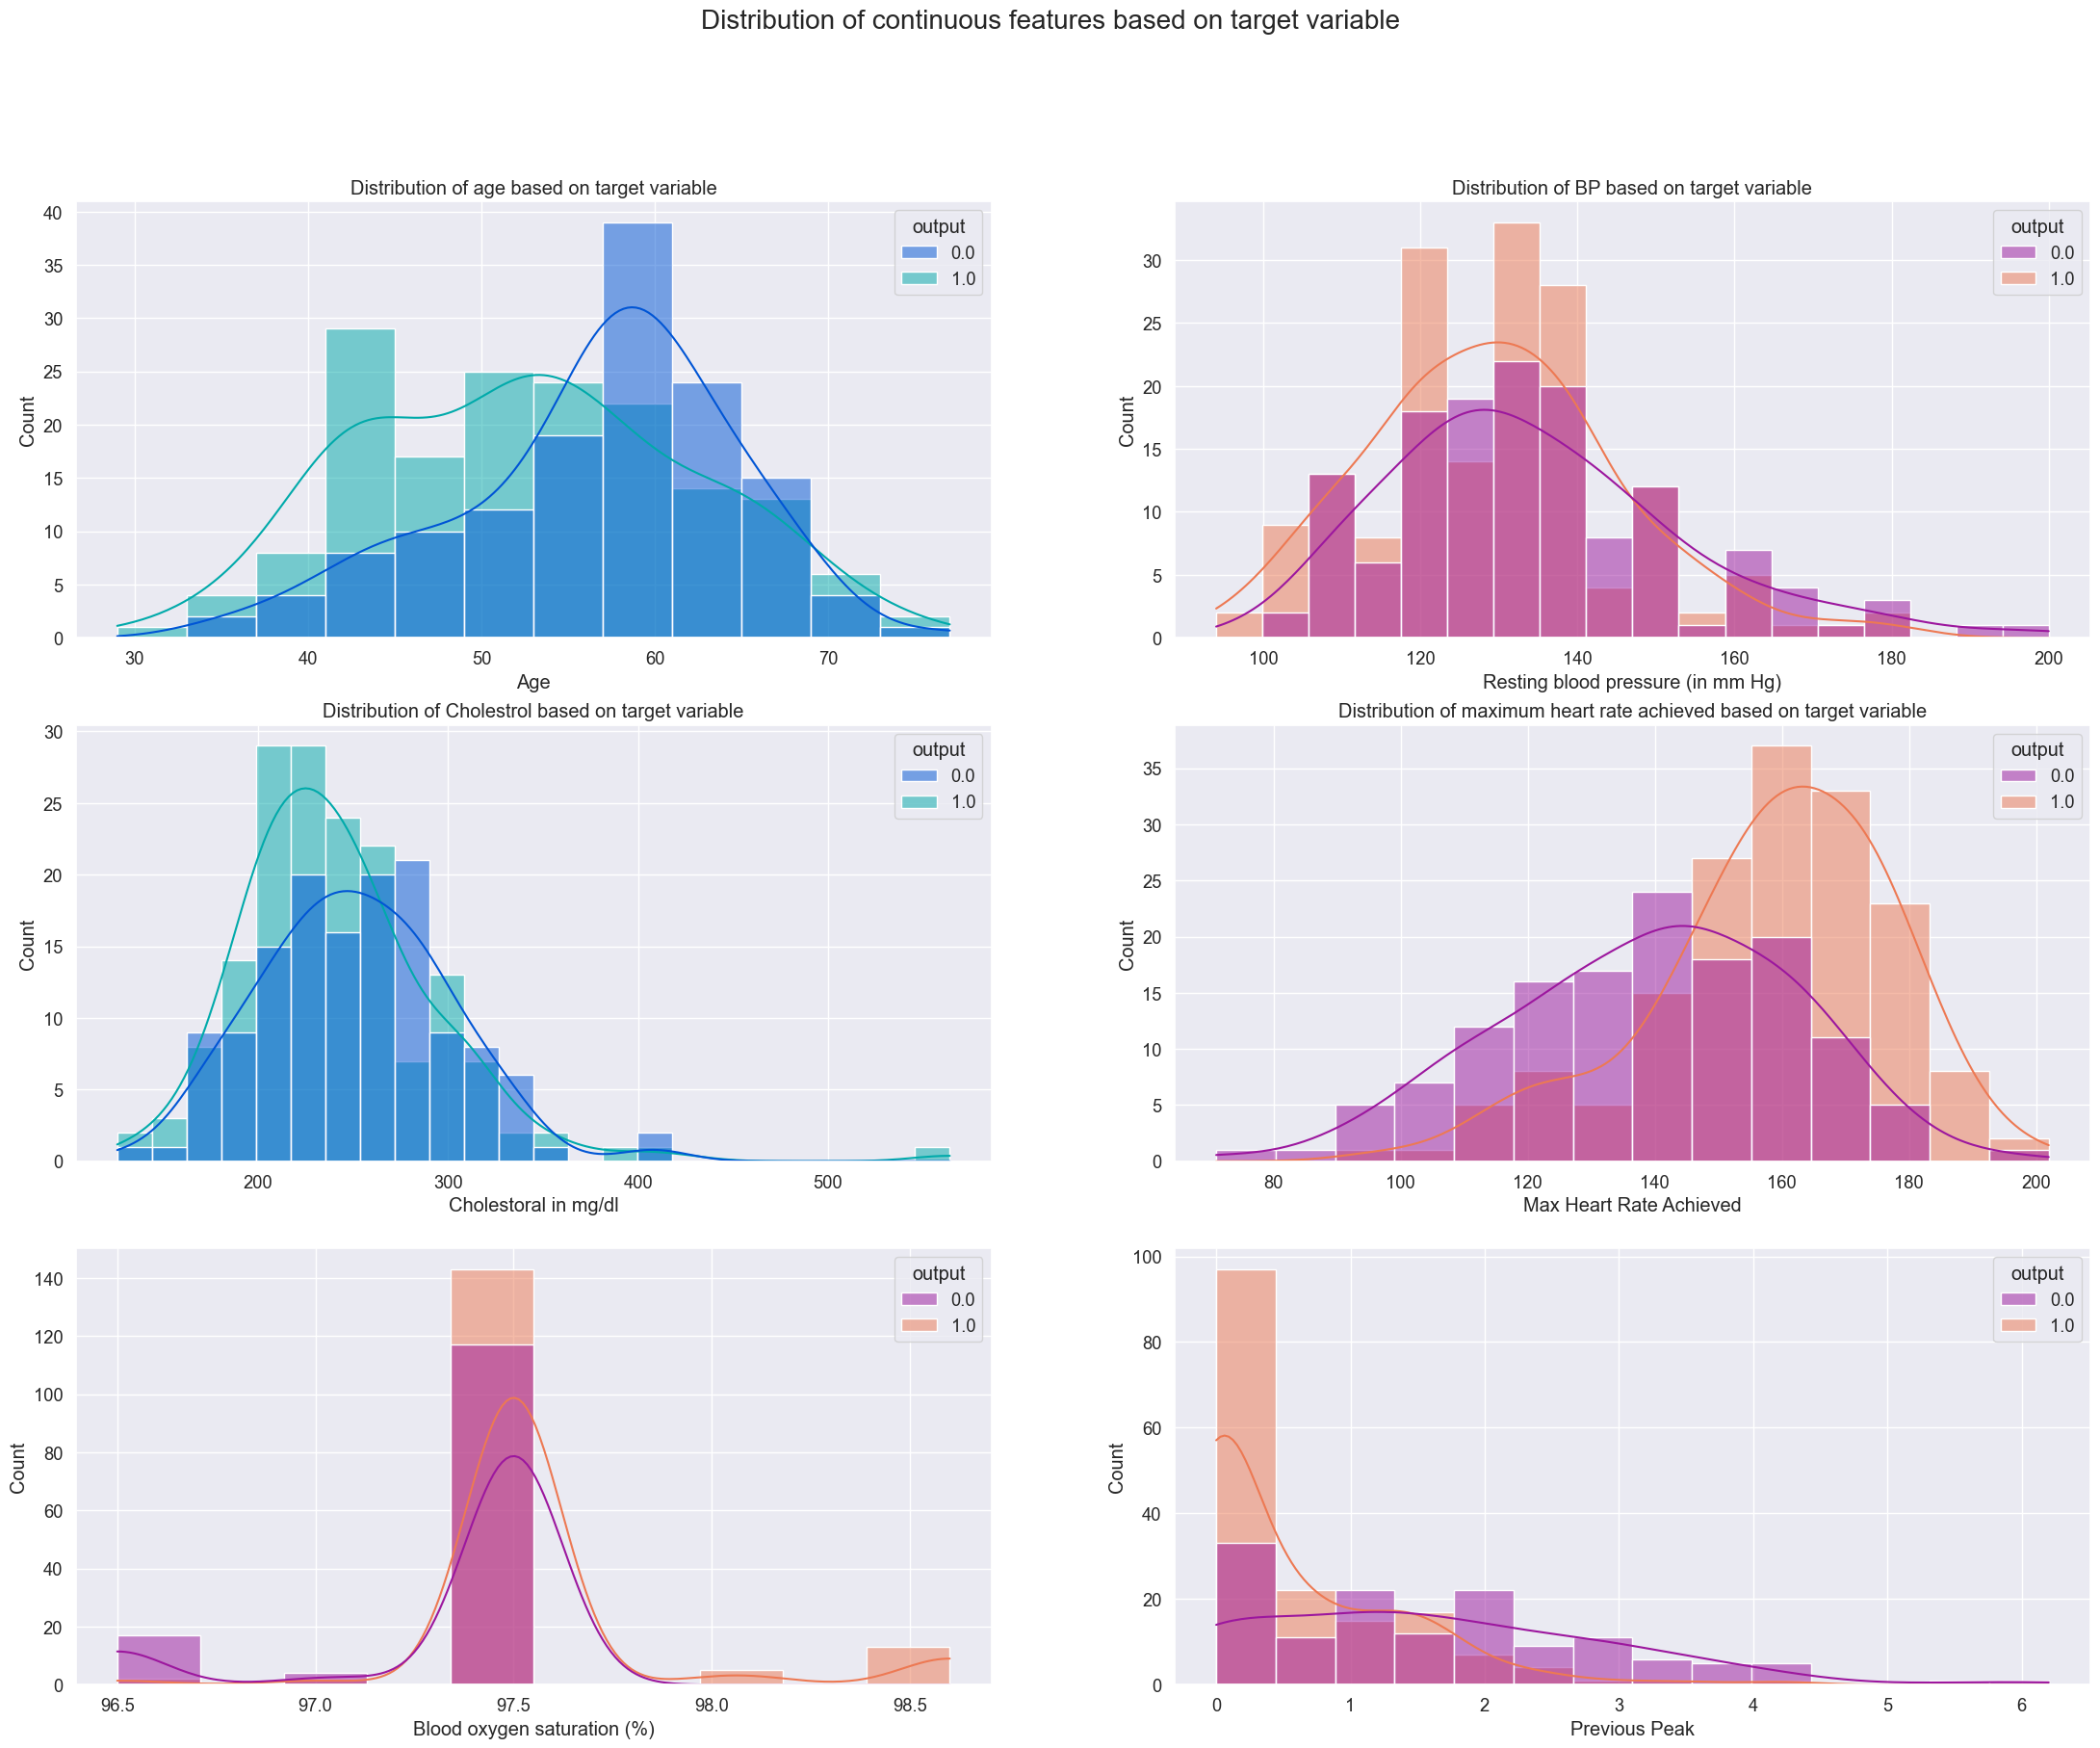

In [13]:
#@title #Normal and Heart Attack Chance distributed on Continuous features
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(3, 2, figsize = (27, 20))

plt.suptitle('Distribution of continuous features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='age', data= df, hue= 'output', kde= True, ax= ax[0, 0], palette='winter')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.histplot(x ='trtbps', data= df, hue= 'output', kde= True, ax= ax[0, 1], palette='plasma')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.histplot(x ='chol', data= df, hue= 'output', kde= True, ax= ax[1, 0], palette='winter')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.histplot(x ='thalachh', data= df, hue= 'output', kde= True, ax= ax[1, 1], palette='plasma')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

ax5 = sns.histplot(x ='o2Saturation', data= df, hue= 'output', kde= True, ax= ax[2, 0], palette='plasma')
ax5.set(xlabel = 'Blood oxygen saturation (%)')


ax6 = sns.histplot(x ='oldpeak', data= df, hue= 'output', kde= True, ax= ax[2, 1], palette='plasma')
ax6.set(xlabel = 'Previous Peak')

plt.show()

### Previous peak based on target variable (output)


* Age - Target Variable 

There is some interesting data in this chart. Typically, the general belief is that heart attack increases with age.
However, the graph tells us that we are wrong about this.
If you have noticed, the number of people at risk of heart attack decreases as age progresses.
Let's take 55 as a base. There is an incredible increase in the blue graph for good health after 55. In other words, there is a decrease in heart attack risk after the age of 55.
On the contrary, a decrease occurs after 55 in the orange graph. In other words, there is a decrease in the risk of heart attack after the age of 55.
To summarize, It's just a general thought that older people may be more likely to have a heart attack, but from a graph of the age and target distribution, it's clear that this isn't the case.

* Resting Blood Pressure

Normal health and heart attack patients are distributed in a similar way for various resting blood pressure. However, the count is higher for the ranges 120-140 for heart diseased patients. Therefore, there can be slight (weak) correlation between the heart attack risk and resting blood pressure range between 120-140. 

* Cholestoral

People with Cholestoral between 200 and 250 have a higher chance of carrying heart disease (heart attack). 

* Maximum Heart Rate Achieved

People with higher heart rate (150-200) are more likely to carry heart disease.

* Blood Oxygen Saturation

97.5 percent oxygen saturation is common among all the patients but there is higher chance of having heart diseased (attack) patient. According to domain knowledge, we expect lower saturation levels have higher probability of heart attack but here we see higher saturations rates have more heart attack cases in comparison to normal. This inbalance might be also due to lack of enough data in our small dataset to balance all the cases and occurances among different patients. 


* Previous Peak

People who are diagnosed with heart disease is observed with a low heart signal peak amplitude which is reasonable since heart rate gets near to stop during heart attack.  


### Let's analyse the categorical features

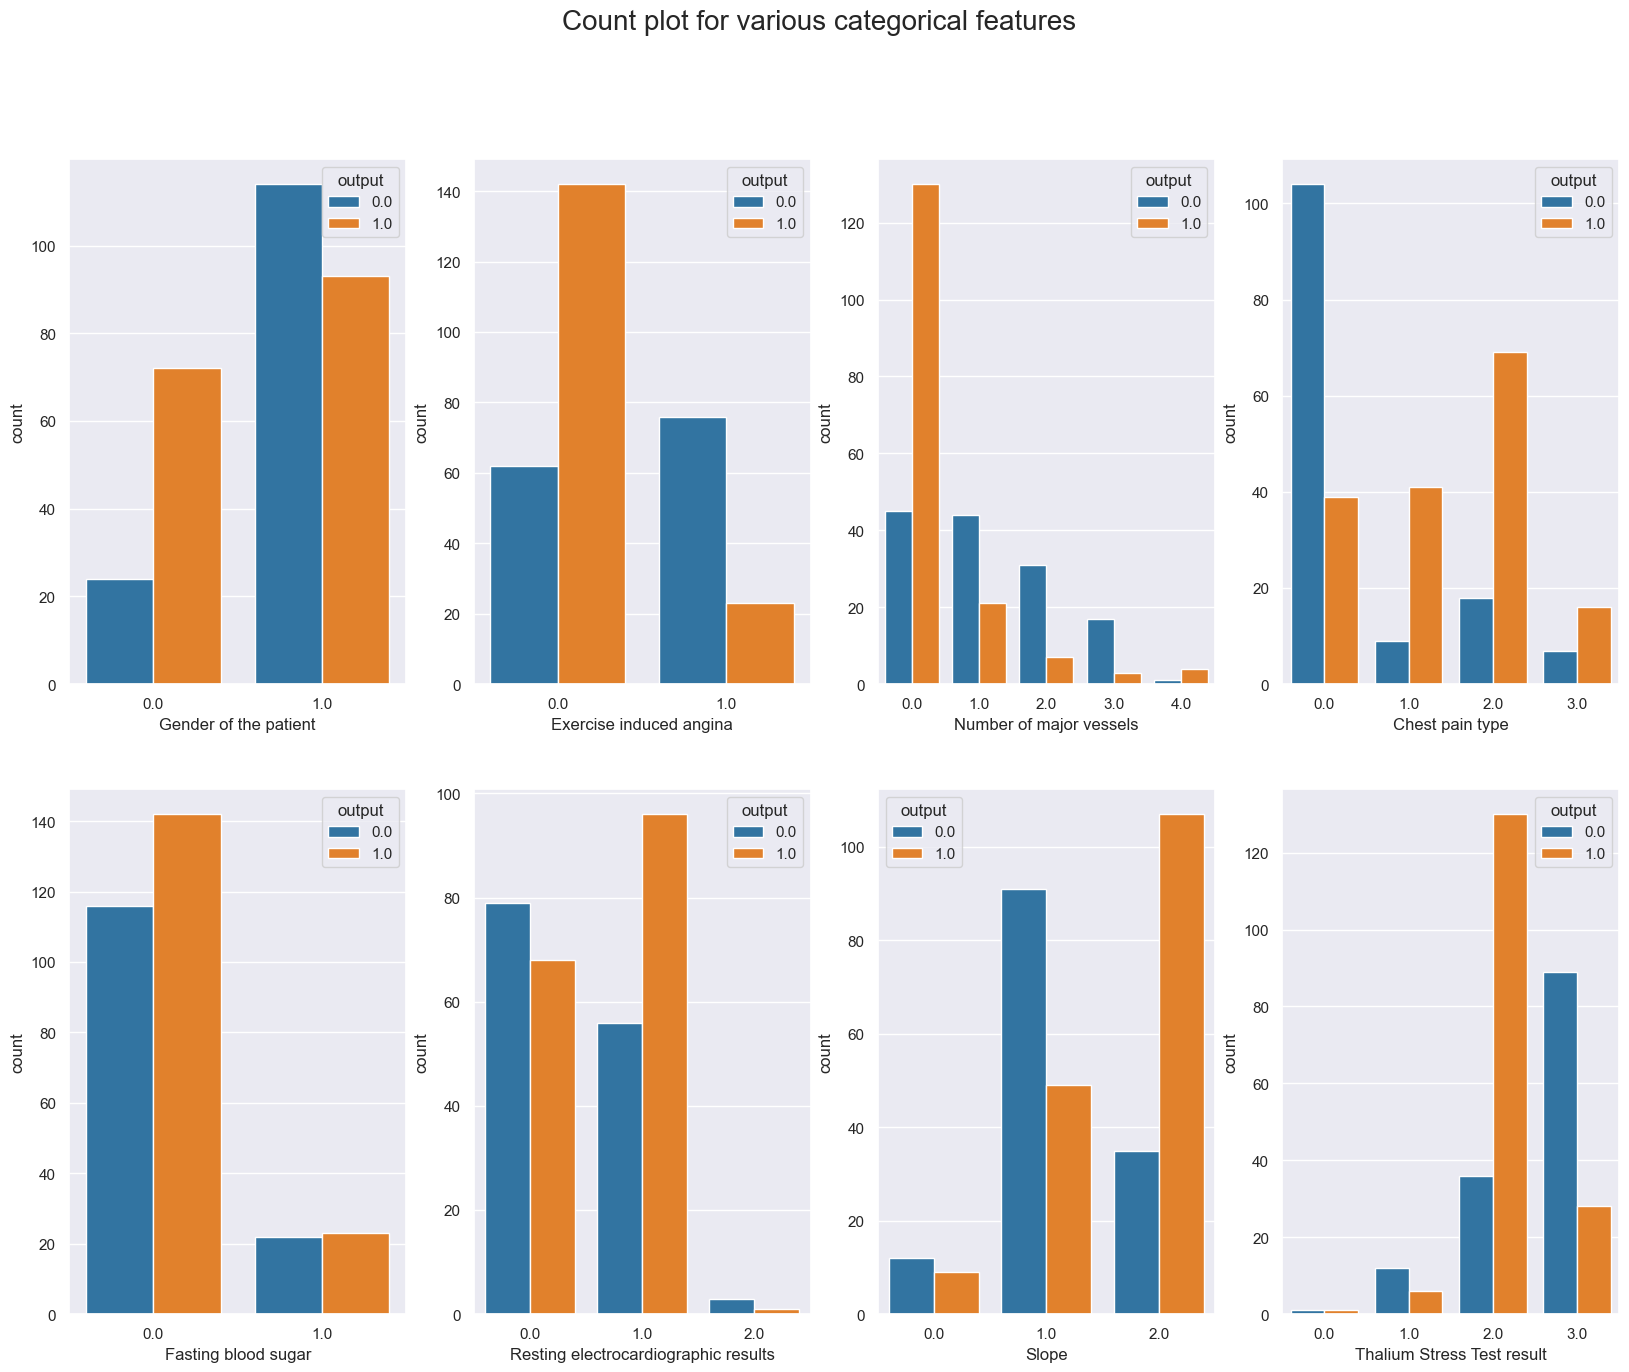

In [14]:
#@title Categorical Feature Analysis
sns.set_context('notebook', font_scale= 1)
fig, ax = plt.subplots(2, 4, figsize = (20, 15))
#ax[3, 3].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 20)

ax1 = sns.countplot(x ='sex', data= df, ax= ax[0, 0], hue = 'output' ,palette= 'tab10')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='exng', data= df, hue= 'output', ax= ax[0, 1], palette= 'tab10')
ax2.set(xlabel = 'Exercise induced angina')

ax3 = sns.countplot(x ='caa', data= df, ax= ax[0, 2], hue = 'output', palette= 'tab10')
ax3.set(xlabel = 'Number of major vessels')

ax4 = sns.countplot(x ='cp', data= df, hue = 'output', ax= ax[0, 3], palette= 'tab10')
ax4.set(xlabel = 'Chest pain type')

ax5 = sns.countplot(x ='fbs', data= df, hue = 'output', ax= ax[1, 0], palette= 'tab10')
ax5.set(xlabel = 'Fasting blood sugar')

ax6 = sns.countplot(x ='restecg', data= df, ax= ax[1,1 ], hue = 'output', palette= 'tab10')
ax6.set(xlabel = 'Resting electrocardiographic results')

ax7 = sns.countplot(x ='slp', data= df, ax= ax[1, 2], hue = 'output', palette= 'tab10')
ax7.set(xlabel = 'Slope')

ax8 = sns.countplot(x ='thall', data= df, ax= ax[1, 3], hue = 'output', palette= 'tab10')
ax8.set(xlabel = 'Thalium Stress Test result')


plt.show()

Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left

Male sex experiences more heart attacks than female. It is surprisingly shocking how heart attack can occur more when there is no exercise induced angina, fasting sugar low, resting electrocardiographic results being normal and having more cases of heart attack. According to domain knowledge that should be the opposite. That may be due to having a very small dataset eventhough the output, target, is balanced.

As slop of the heart rate increases the heart attack chances increase.

In general, we found as thalium stress increases the heart attack chances increase.

Chest pain having higher chance of heart attack for less symptomatic cases such as non-angina pain instead of typical angina. That untypical situation may be due to the small dataset we have.

### Female - Male Category Analysis : 

In [15]:
#@title #Participants female male category
colors = ['gold', 'mediumturquoise']
labels = ['Female','Male']
values = df['sex'].value_counts()/df['sex'].shape[0]

fig1 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig1.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig1.update_layout(
    title_text="All participants sexes",
    title_font_color="black",
    legend_title_font_color="yellow",
    #paper_bgcolor="black",
    #plot_bgcolor='black',
    font_color="black",
)
fig1.show()

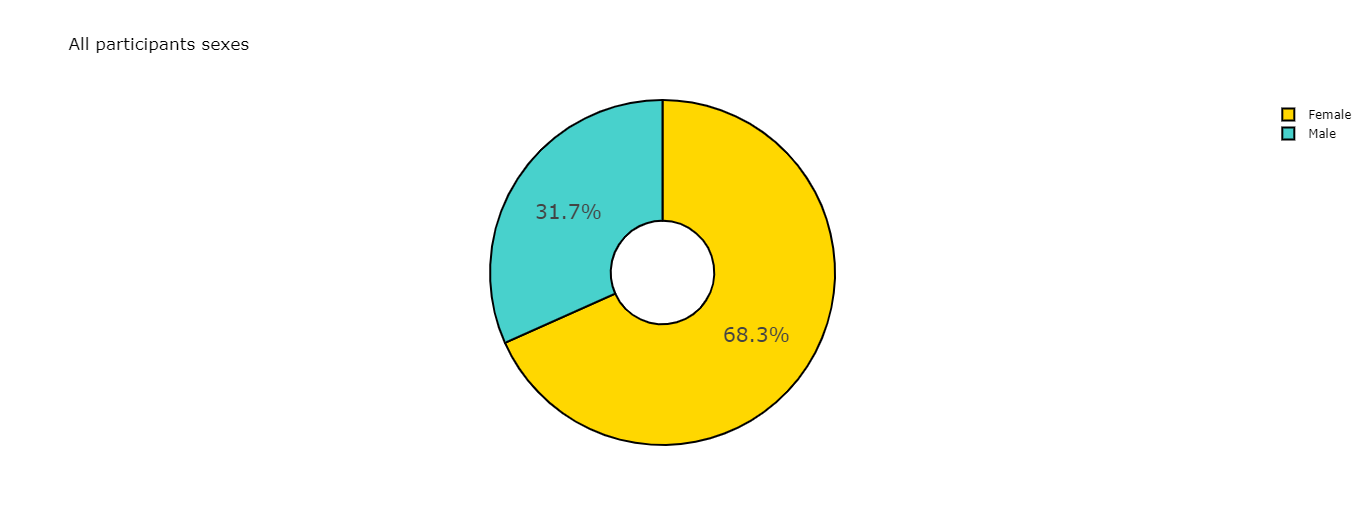

### Age Group Distribution:


In [16]:
def age_cohort(age):
    if age <= 45:
        return "0-45"
    elif age > 45 and age <= 55:
        return "45-55"
    elif age > 55 and age <= 60:
        return "55-60"
    elif age > 60:
        return "60+"
df_age = df.copy()    
df_age['age'] = df_age['age'].apply(age_cohort)
df.sort_values('age', inplace = True)

In [17]:
colors = ['gold', 'mediumturquoise']
labels = df_age['age'].value_counts().index
values = df_age['age'].value_counts()

fig2 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig2.update_layout(
    title_text="Age Group Distribution"
)
fig2.show()

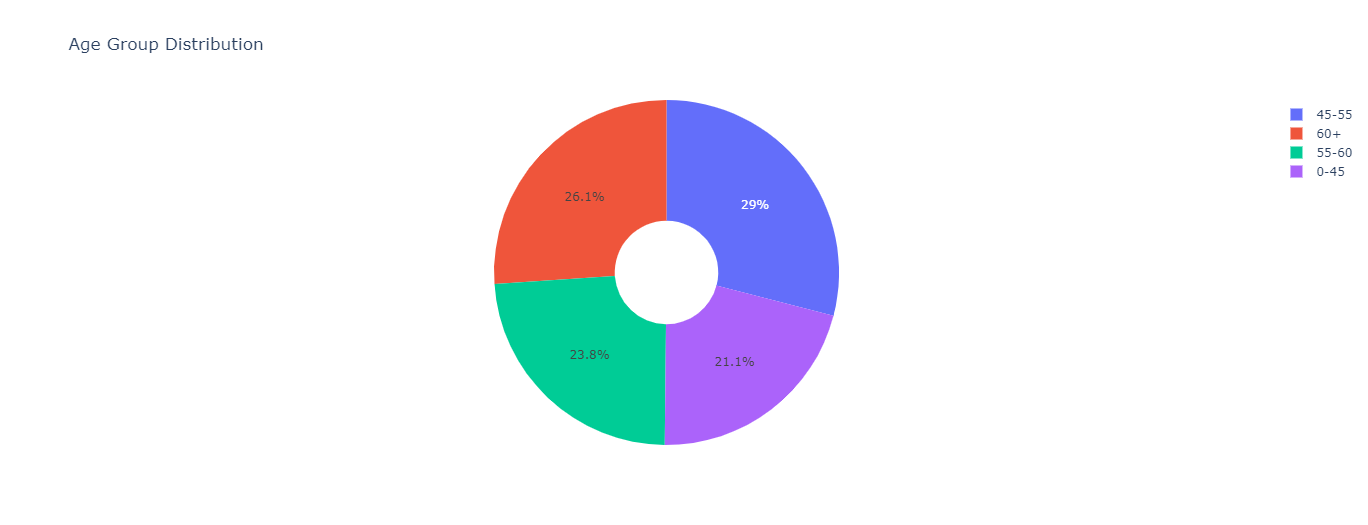

###Number of people between the ages:
###0-45 are 21.1 % 
###45-55 are 29%
###55-60 are 23.8 % 
###60+ are 26.1%

### Number of people in sexes:
###Female 68.3%
### Male 31.7 % 

### Here, we see that age is distributed normally (balanced) whereas sex is slightly unbalanced which might be due to having a small dataset. 

## Correlation Check using Heat Map for all the features

In [18]:
df

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
72   29.0  1.0  1.0   130.0  204.0  0.0      0.0     202.0   0.0      0.0   
58   34.0  1.0  3.0   118.0  182.0  0.0      0.0     174.0   0.0      0.0   
125  34.0  0.0  1.0   118.0  210.0  0.0      1.0     192.0   0.0      0.7   
239  35.0  1.0  0.0   126.0  282.0  0.0      0.0     156.0   1.0      0.0   
65   35.0  0.0  0.0   138.0  183.0  0.0      1.0     182.0   0.0      1.4   
..    ...  ...  ...     ...    ...  ...      ...       ...   ...      ...   
60   71.0  0.0  2.0   110.0  265.0  1.0      0.0     130.0   0.0      0.0   
151  71.0  0.0  0.0   112.0  149.0  0.0      1.0     125.0   0.0      1.6   
129  74.0  0.0  1.0   120.0  269.0  0.0      0.0     121.0   1.0      0.2   
144  76.0  0.0  2.0   140.0  197.0  0.0      2.0     116.0   0.0      1.1   
238  77.0  1.0  0.0   125.0  304.0  0.0      0.0     162.0   1.0      0.0   

     slp  caa  thall  output  o2Saturation  
72   2.0  0.0    2.0     1.0          97.5  
58   2.0  0.0    2.0     1.0          97.5  
125  2.0  0.0    2.0     1.0          97.5  
239  2.0  0.0    3.0     0.0          97.5  
65   2.0  0.0    2.0     1.0          97.5  
..   ...  ...    ...     ...           ...  
60   2.0  1.0    2.0     1.0          97.5  
151  1.0  0.0    2.0     1.0          97.5  
129  2.0  1.0    2.0     1.0          97.5  
144  1.0  0.0    2.0     1.0          98.1  
238  2.0  3.0    2.0     0.0          97.5  

[303 rows x 15 columns]

<AxesSubplot:>

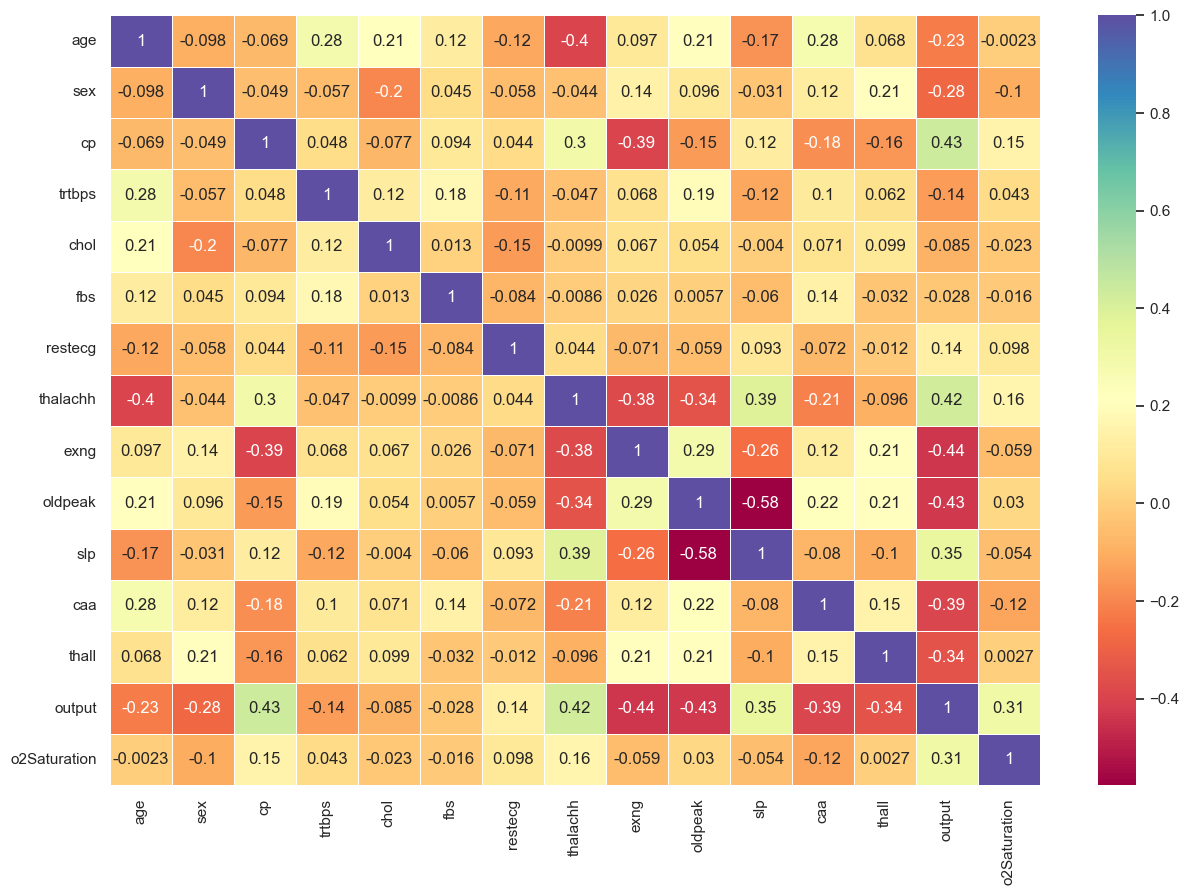

In [19]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

Summary :

Heart attack chances are highly correlated with chest pain, maximum heart rate achieved and inversely correlated with previous exng heart signal peak. Hence, they are important variables to consider for test and training data sets.

It is important to have as little correlation as possible among variables with output and in general it agrees in the heat map

We can drop " colesterol" and "fasting blood pressure" columns since the last they do not display a strong correlation as we also showed for the last two how they do not display domain knowledge trends at categorical feature analysis.

As shown in data analysis, it is surprising to see exercise induced angina, exng, at 0 highly correlating with output.

Let's check high correlation of categorical features to go deeper in what category level has significant correlation with heart disease.

Checking the correlations, there is significant number of heart disease cases at 0 vessel. Typically that is what we will see for heart attack cases having 0 vessels. 

As we also visualized at categorical analysis, the 0 vessel has heart attack chance higher. 
Exercise induced angina 0 correlates highly with heart attack.

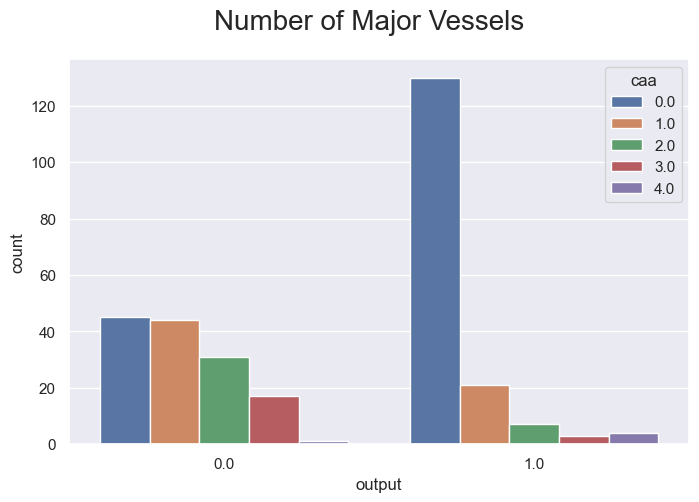

In [20]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x ='output', hue = "caa", data = df)
plt.suptitle('Number of Major Vessels', fontsize = 20)
plt.show()

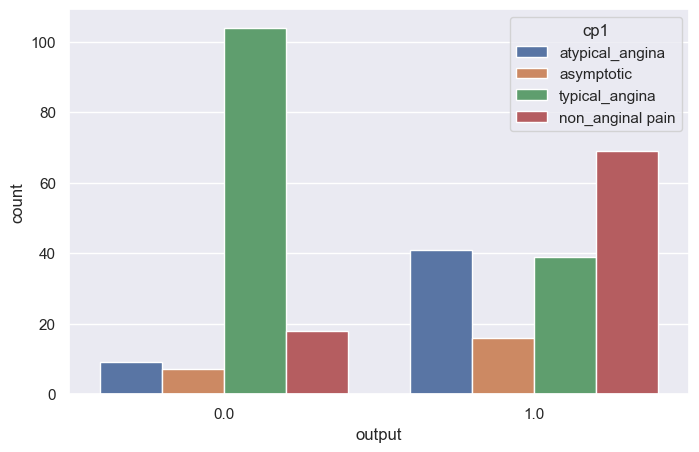

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})
 
# count plot on two categorical variable
renamed1_df = df.copy()
renamed1_df['cp1']= renamed1_df['cp'].replace([0, 1, 2, 3], ["typical_angina","atypical_angina","non_anginal pain","asymptotic"])

sns.countplot(x ='output', hue = "cp1", data = renamed1_df)
 
# Show the plot
plt.show()

Description:
#### Analysis Outputs <a id = 34></a>
#### Age 
* the "thalachh" variable has the highest correlation with the "age" variable. There is a negative correlation between them, which we can call moderately.
* The severity of the correlation is -0.40. In other words, there is a  highly inverse relationship between the "age" and "thalachh" variables.
* In summary, we can say that the amount of heart rate reached decreases as age increases because there is an inverse proportion between them.

#### Trtbps 
*  "age" variable has the highest correlation with the "trtbps" variable. The correlation between them is 0.28
*  There is a positive low-intensity correlation.
*  As "age" increases, the resting blood pressure increases.


#### Chol 
*  "Age" has the highest correlation with "Chol" variable. 
*  The correlation is low positive with a magnitude of 0.21.
*  As age increases, cholesterol also increases.


#### Thelachh
*  The "Thalach" variable has the highest correlation with the "output" variable.

*  There is a 0.42 positive and moderate correlation between them. In other words, it is a variable that can directly trigger a heart attack.

*  There is a variable with which this variable has many correlations.

*  These correlations mean that the maximum heart rate reached maybe a situation triggered by other variables.

#### Oldpeak
*  The most significant correlation ratio among all the variables in the plot is -0.58 between the "slope" and "oldpeak" variable.
*  The correlation between them is negative, which is slightly above medium intensity.
*  The "target" variable is the second most significant correlation which is negative low-intensity.

#### Sex

*  No robust correlation exists between other variables and sex. Only a low-intensity negative correlation -0.28 with "output". 
#### Fbs

*  There is no good correlation of fasting blood sugar with other features. The highest correlation is positive low-intensity correlation with "trtbps" . 

*  We can conclude this as fasting blood sugar increases, resting blood pressure also increases.

#### Rest_ecg

*  There is no good correlation of resting electrchardiographic results with other features. The highest correlation is positive low-intensity correlation with "caa" with highest correlation ratio 0.14 and low-intensity correlation ratio -0.15 with "chol".

#### Exng

*  The "output" variable has the highest correlation to the exercise-induced angina variable with -0.44 correlation ratio. 
*  Additionally, it correlates with other features in addition to "output".

#### Slp

*  "Slp" has highest correlation with "oldpeak" with -0.58 correlation ratio which higher than a moderate correlation and is significant. 

*  There are moderate correlations of slope with "output" and "thalachh". 

*  The lower the heart rate peak, higher the slope. 


#### caa

*  The "Caa" variable has the highest correlation with the output variable as -0.39.
*  Then comes the "age" variable with 0.28. We can say that there is a low positive correlation with the age variable. 

#### thall

*  Thallium stress test results have highest correlation with output at -0.34. There are few more low correlations.  

#### output

*  Output correlates with more than one variable however relationships are below the middle level around 0.4 . 

## DATA PROCESESSING AND DATA PREPARATION

### Let's drop the columns that are low in correlation with the output (our target as heart disease or none). 


In [22]:
df.head()

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  \
72   29.0  1.0  1.0   130.0  204.0  0.0      0.0     202.0   0.0      0.0   
58   34.0  1.0  3.0   118.0  182.0  0.0      0.0     174.0   0.0      0.0   
125  34.0  0.0  1.0   118.0  210.0  0.0      1.0     192.0   0.0      0.7   
239  35.0  1.0  0.0   126.0  282.0  0.0      0.0     156.0   1.0      0.0   
65   35.0  0.0  0.0   138.0  183.0  0.0      1.0     182.0   0.0      1.4   

     slp  caa  thall  output  o2Saturation  
72   2.0  0.0    2.0     1.0          97.5  
58   2.0  0.0    2.0     1.0          97.5  
125  2.0  0.0    2.0     1.0          97.5  
239  2.0  0.0    3.0     0.0          97.5  
65   2.0  0.0    2.0     1.0          97.5

In [23]:
df.drop(["chol", "fbs"], axis = 1, inplace = True)

## Checking outliers


### Now cholestoral box plot from previous continuous feature data analysis is eliminated. Let's check for other continuous features if they have outliers. Let's check them again and eliminate them.
### Here the data is concentrated to the right for maximum heart rate achieved. It is to the left for previous peak. The outliers are the small circles here.

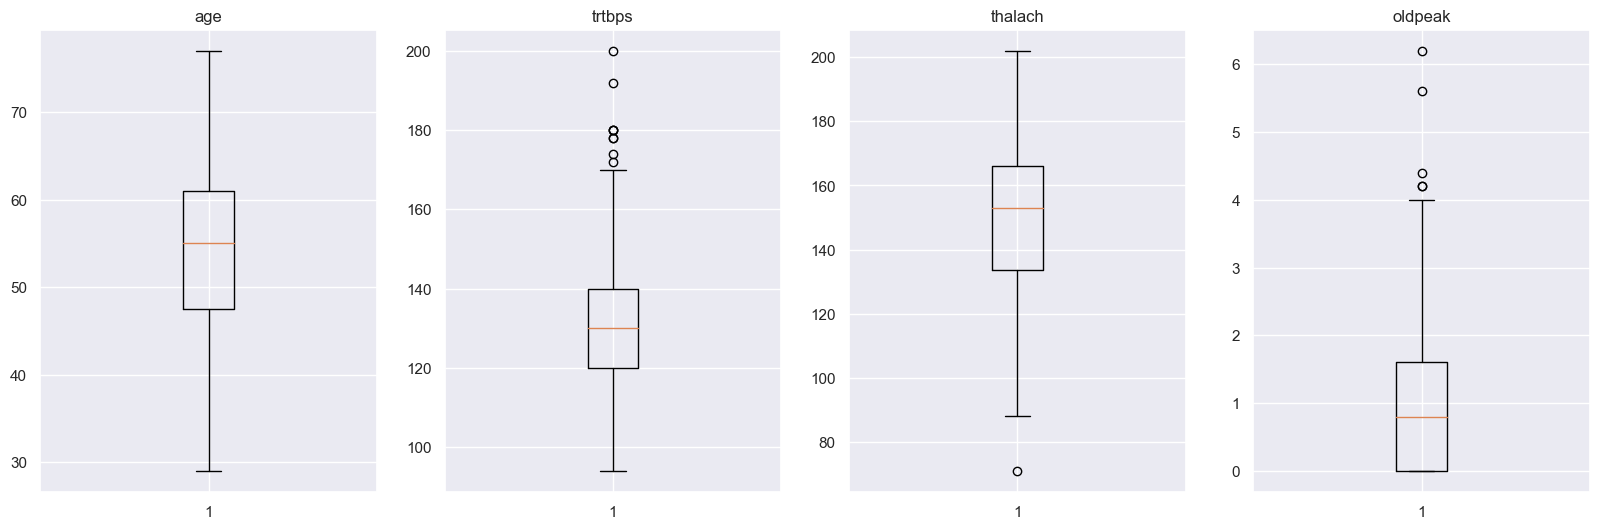

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalachh"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

### Identify the each outliers for resting blood pressure 

### I picked three treshholds using z scores to see outliers for each.

In [25]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


### Detecting the outliers:

In [26]:
df[z_scores_trtbps > 2][["trtbps"]]

trtbps
8     172.0
248   192.0
266   180.0
223   200.0
292   170.0
241   174.0
101   178.0
228   170.0
195   170.0
152   170.0
110   180.0
260   178.0
203   180.0

### Let's limit the outliers by limiting min max values by applying winsorize method that replaces the min and max data points by the observations closest to them. 

In [27]:
df[z_scores_trtbps > 2].trtbps.min()

170.0

In [28]:
df[df["trtbps"] < 170].trtbps.max()

165.0

### Using the winsorize method, we are limiting the extreme values in statistical data to reduce the effects of possibly spurious outliers. 

In [29]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [30]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [31]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

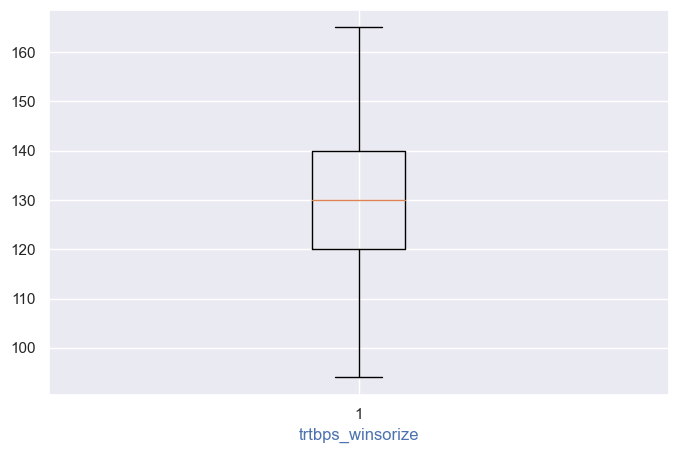

In [32]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [33]:
df["trtbps_winsorize"] = trtbps_winsorize

In [34]:
df.head()

age  sex   cp  trtbps  restecg  thalachh  exng  oldpeak  slp  caa  \
72   29.0  1.0  1.0   130.0      0.0     202.0   0.0      0.0  2.0  0.0   
58   34.0  1.0  3.0   118.0      0.0     174.0   0.0      0.0  2.0  0.0   
125  34.0  0.0  1.0   118.0      1.0     192.0   0.0      0.7  2.0  0.0   
239  35.0  1.0  0.0   126.0      0.0     156.0   1.0      0.0  2.0  0.0   
65   35.0  0.0  0.0   138.0      1.0     182.0   0.0      1.4  2.0  0.0   

     thall  output  o2Saturation  trtbps_winsorize  
72     2.0     1.0          97.5             130.0  
58     2.0     1.0          97.5             118.0  
125    2.0     1.0          97.5             118.0  
239    3.0     0.0          97.5             126.0  
65     2.0     1.0          97.5             138.0

# Identify and eliminate Thalach feature outliers

Let's code to find the outliers by limiting the values between 0.25 and 0.75 quantile

In [35]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [36]:
thalachh_out = iqr(df, "thalachh")


## Only one outlier detected

In [37]:
thalachh_out


age  sex   cp  trtbps  restecg  thalachh  exng  oldpeak  slp  caa  \
272  67.0  1.0  0.0   120.0      1.0      71.0   0.0      1.0  1.0  0.0   

     thall  output  o2Saturation  trtbps_winsorize  
272    2.0     0.0          97.0             120.0

In [38]:
df.drop([272], axis = 0, inplace = True)

In [39]:
df["thalachh"][270:275]

150    138.0
51     151.0
247    120.0
153    152.0
265    132.0
Name: thalachh, dtype: float64

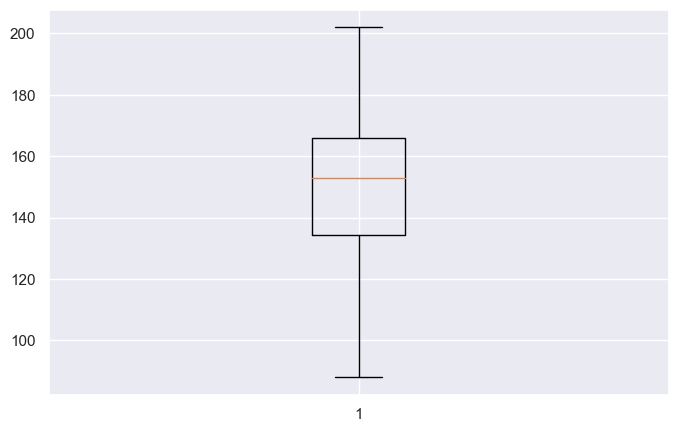

In [40]:
plt.boxplot(df["thalachh"]);

# Identify and eliminate outliers of Oldpeak variable

In [41]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

### these are the outliers

In [42]:
iqr(df, "oldpeak")

age  sex   cp  trtbps  restecg  thalachh  exng  oldpeak  slp  caa  \
250  51.0  1.0  0.0   140.0      1.0     122.0   1.0      4.2  1.0  3.0   
221  55.0  1.0  0.0   140.0      1.0     111.0   1.0      5.6  0.0  0.0   
291  58.0  1.0  0.0   114.0      2.0     140.0   0.0      4.4  0.0  3.0   
101  59.0  1.0  3.0   178.0      0.0     145.0   0.0      4.2  0.0  0.0   
204  62.0  0.0  0.0   160.0      0.0     145.0   0.0      6.2  0.0  3.0   

     thall  output  o2Saturation  trtbps_winsorize  
250    3.0     0.0          97.5             140.0  
221    3.0     0.0          97.5             140.0  
291    1.0     0.0          97.5             114.0  
101    3.0     1.0          97.5             165.0  
204    3.0     0.0          97.5             160.0

In [43]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

### Let's see the rest of the data is what percentage of the whole data points

In [44]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


### It is quite high which means we can eliminate the outliers without any worry for what dataset left for modeling. 

In [45]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

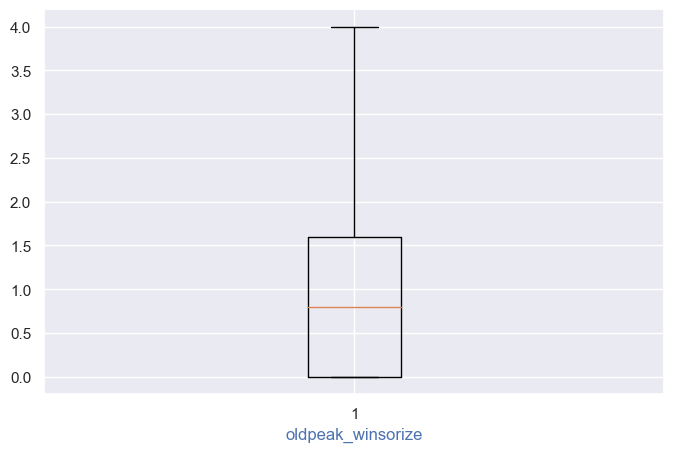

In [46]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [47]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [48]:
df.head()

age  sex   cp  trtbps  restecg  thalachh  exng  oldpeak  slp  caa  \
72   29.0  1.0  1.0   130.0      0.0     202.0   0.0      0.0  2.0  0.0   
58   34.0  1.0  3.0   118.0      0.0     174.0   0.0      0.0  2.0  0.0   
125  34.0  0.0  1.0   118.0      1.0     192.0   0.0      0.7  2.0  0.0   
239  35.0  1.0  0.0   126.0      0.0     156.0   1.0      0.0  2.0  0.0   
65   35.0  0.0  0.0   138.0      1.0     182.0   0.0      1.4  2.0  0.0   

     thall  output  o2Saturation  trtbps_winsorize  oldpeak_winsorize  
72     2.0     1.0          97.5             130.0                0.0  
58     2.0     1.0          97.5             118.0                0.0  
125    2.0     1.0          97.5             118.0                0.7  
239    3.0     0.0          97.5             126.0                0.0  
65     2.0     1.0          97.5             138.0                1.4

### Finally, let's drop the columns that less correlate

In [49]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

### Final dataset after outliers are manipulated and eliminated

In [50]:
df.head()

age  sex   cp  restecg  thalachh  exng  slp  caa  thall  output  \
72   29.0  1.0  1.0      0.0     202.0   0.0  2.0  0.0    2.0     1.0   
58   34.0  1.0  3.0      0.0     174.0   0.0  2.0  0.0    2.0     1.0   
125  34.0  0.0  1.0      1.0     192.0   0.0  2.0  0.0    2.0     1.0   
239  35.0  1.0  0.0      0.0     156.0   1.0  2.0  0.0    3.0     0.0   
65   35.0  0.0  0.0      1.0     182.0   0.0  2.0  0.0    2.0     1.0   

     o2Saturation  trtbps_winsorize  oldpeak_winsorize  
72           97.5             130.0                0.0  
58           97.5             118.0                0.0  
125          97.5             118.0                0.7  
239          97.5             126.0                0.0  
65           97.5             138.0                1.4

# Applying One hot encoding method to categorical variables

### Let's charactarize each categorical variable component with a numerical encoding. This allow us to use model predictions more proficiently. 

In [51]:
numeric_var = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categoric_var = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [52]:
categoric_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [53]:
categoric_var.remove("fbs")

In [54]:
categoric_var

['sex', 'cp', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [55]:
df = pd.get_dummies(df, columns = categoric_var[:-1], drop_first = True)

In [56]:
df.head()

age  thalachh  output  o2Saturation  trtbps_winsorize  \
72   29.0     202.0     1.0          97.5             130.0   
58   34.0     174.0     1.0          97.5             118.0   
125  34.0     192.0     1.0          97.5             118.0   
239  35.0     156.0     0.0          97.5             126.0   
65   35.0     182.0     1.0          97.5             138.0   

     oldpeak_winsorize  sex_1.0  cp_1.0  cp_2.0  cp_3.0  ...  exng_1.0  \
72                 0.0        1       1       0       0  ...         0   
58                 0.0        1       0       0       1  ...         0   
125                0.7        0       1       0       0  ...         0   
239                0.0        1       0       0       0  ...         1   
65                 1.4        0       0       0       0  ...         0   

     slp_1.0  slp_2.0  caa_1.0  caa_2.0  caa_3.0  caa_4.0  thall_1.0  \
72         0        1        0        0        0        0          0   
58         0        1        0        0        0        0          0   
125        0        1        0        0        0        0          0   
239        0        1        0        0        0        0          0   
65         0        1        0        0        0        0          0   

     thall_2.0  thall_3.0  
72           1          0  
58           1          0  
125          1          0  
239          0          1  
65           1          0  

[5 rows x 22 columns]

### Feature scaling with the RobustScaler method of continuous and numerical variables for ML models use

In [57]:
final_dataset = df.copy()

In [58]:
new_numeric_var = ["age", "thalachh", "trtbps_winsorize", "oldpeak_winsorize"]

In [59]:
robust_scaler = RobustScaler()

In [60]:
final_dataset[new_numeric_var] = robust_scaler.fit_transform(df[new_numeric_var])

### Final dataset/ dataframe before modeling

We have 22 columns in the dataset where we removed 3 continuous features and added the each elements of categorical features as columns at one hot encoding. 

In [61]:
df.shape

(302, 22)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 72 to 238
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                302 non-null    float64
 1   thalachh           302 non-null    float64
 2   output             302 non-null    float64
 3   o2Saturation       302 non-null    float64
 4   trtbps_winsorize   302 non-null    float64
 5   oldpeak_winsorize  302 non-null    float64
 6   sex_1.0            302 non-null    uint8  
 7   cp_1.0             302 non-null    uint8  
 8   cp_2.0             302 non-null    uint8  
 9   cp_3.0             302 non-null    uint8  
 10  restecg_1.0        302 non-null    uint8  
 11  restecg_2.0        302 non-null    uint8  
 12  exng_1.0           302 non-null    uint8  
 13  slp_1.0            302 non-null    uint8  
 14  slp_2.0            302 non-null    uint8  
 15  caa_1.0            302 non-null    uint8  
 16  caa_2.0            302 no

In [63]:
final_dataset.describe()

age    thalachh      output  o2Saturation  trtbps_winsorize  \
count  302.000000  302.000000  302.000000    302.000000        302.000000   
mean    -0.049127   -0.098181    0.546358     97.486093          0.055132   
std      0.659483    0.713948    0.498673      0.352125          0.805895   
min     -1.890909   -2.063492    0.000000     96.500000         -1.800000   
25%     -0.563636   -0.587302    0.000000     97.500000         -0.500000   
50%      0.000000    0.000000    1.000000     97.500000          0.000000   
75%      0.436364    0.412698    1.000000     97.500000          0.500000   
max      1.600000    1.555556    1.000000     98.600000          1.750000   

       oldpeak_winsorize     sex_1.0      cp_1.0      cp_2.0      cp_3.0  ...  \
count         302.000000  302.000000  302.000000  302.000000  302.000000  ...   
mean            0.140315    0.682119    0.165563    0.288079    0.076159  ...   
std             0.694980    0.466426    0.372305    0.453620    0.265693  ...   
min            -0.500000    0.000000    0.000000    0.000000    0.000000  ...   
25%            -0.500000    0.000000    0.000000    0.000000    0.000000  ...   
50%             0.000000    1.000000    0.000000    0.000000    0.000000  ...   
75%             0.500000    1.000000    0.000000    1.000000    0.000000  ...   
max             2.000000    1.000000    1.000000    1.000000    1.000000  ...   

         exng_1.0     slp_1.0     slp_2.0     caa_1.0     caa_2.0     caa_3.0  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.327815    0.460265    0.470199    0.215232    0.125828    0.066225   
std      0.470196    0.499246    0.499939    0.411665    0.332206    0.249088   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          caa_4.0   thall_1.0   thall_2.0   thall_3.0  
count  302.000000  302.000000  302.000000  302.000000  
mean     0.016556    0.059603    0.546358    0.387417  
std      0.127813    0.237142    0.498673    0.487969  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000    0.000000  
75%      0.000000    0.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 22 columns]

# Seperating data into test and training set

In [64]:

X = df.drop(["output"], axis = 1)
y = df[["output"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [65]:
X_train.head()

age  thalachh  o2Saturation  trtbps_winsorize  oldpeak_winsorize  \
101  59.0     145.0          97.5             165.0                4.0   
41   48.0     180.0          97.5             130.0                0.2   
64   58.0     165.0          97.5             140.0                0.0   
110  64.0     154.0          97.5             165.0                0.0   
227  35.0     130.0          97.5             120.0                1.6   

     sex_1.0  cp_1.0  cp_2.0  cp_3.0  restecg_1.0  ...  exng_1.0  slp_1.0  \
101        1       0       0       1            0  ...         0        0   
41         1       1       0       0            0  ...         0        1   
64         1       0       1       0            0  ...         0        0   
110        0       0       0       0            1  ...         1        0   
227        1       0       0       0            1  ...         1        1   

     slp_2.0  caa_1.0  caa_2.0  caa_3.0  caa_4.0  thall_1.0  thall_2.0  \
101        0        0        0        0        0          0          0   
41         0        0        0        0        0          0          1   
64         1        0        0        0        0          0          1   
110        1        0        0        0        0          0          1   
227        0        0        0        0        0          0          0   

     thall_3.0  
101          1  
41           0  
64           0  
110          0  
227          1  

[5 rows x 21 columns]

In [66]:
y_train.head()

output
101     1.0
41      1.0
64      1.0
110     1.0
227     0.0

In [67]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


There are 31 test data points and 271 training data points.

# Data Modeling

This is a classification problem in machine learning to classify patients as having heart attack risk or non (normal health). 

We are not considering any neural network algorithms here since it performs well in large datasets hence it is not necessary for our small dataset. 

We will try binary classification algorithms starting with logistic regression, decision trees, support vector machines, decision trees, random forests, K-nearest neighborhood, bernoulli naive bayes and ensemble algorithms such as XGBoost, AdaBoost, Extra Trees Classifier, Gradient Booster Classifier, CatBoost Classifier. 

## Logistic Regression Algorithm 

## ROC Curve and Area Under ROC Curve

The area of field under the curve given tells us how likely the logistic regression could evaluate true results. As it is closer to the y axis therefore has bigger area under the plot, we can conclude there are significantly correct prediction results. 


###  Here we get 0.93 AUC value which is close to be excellent if we categorize them as 0.8-0.9 good and 0.9-1 as excellent. 

## Hyperparameter optimization with GridSearchCV.

Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

 It tries all different combinations to identify the best performing hyper parameters of the ML model. It is a simple algorithm to use hence it works well with small data sets like ours rather than large. 

## Logistic Regression Parameter Set 1

In [92]:
def lr(X_train, y_train, X_test, y_test):
    
    parameters = {'penalty': ['l1', 'l2'],
                  'solver': ['liblinear']}

#    parameters = {'penalty': ['l2'], 
#                  'C': [0.001,0.01,0.1,1,10,100,1000],
#                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 

    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        lr = LogisticRegression(penalty=p['penalty'], solver=p['solver'])
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_lr)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_lr = best_accuracy
    conf = confusion_matrix(y_test, y_pred_lr)
    clf_report = classification_report(y_test, y_pred_lr)

    print(f"Accuracy Logistic Regression is : {acc_lr}")
    print(f"Best Parameters : {best_parameters}")
#    print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
    
    return acc_lr

acc_lr  = lr(X_train, y_train, X_test, y_test)

Accuracy Logistic Regression is : 0.8064516129032258
Best Parameters : {'penalty': 'l2', 'solver': 'liblinear'}
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70         9
         1.0       0.90      0.82      0.86        22

    accuracy                           0.81        31
   macro avg       0.77      0.80      0.78        31
weighted avg       0.82      0.81      0.81        31



C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



##Logistic Regression Set 2

In [91]:
def  lr(X_train, y_train, X_test, y_test):
    parameters = {"penalty":["l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    #grid = GridSearchCV(log_reg_new, param_grid = parameters)
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        lr = LogisticRegression(penalty=p['penalty'], solver=p['solver'])
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_lr)
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        acc_lr = best_accuracy
        conf = confusion_matrix(y_test, y_pred_lr)
        clf_report = classification_report(y_test, y_pred_lr)
        print(f"Accuracy Logistic Regression is : {acc_lr}")
        print(f"Best Parameters : {best_parameters}")
#    print(f"Confusion Matrix : \n{conf}")
        print(f"Classification Report : \n{clf_report}")    
    
        return acc_lr

acc_lr2  = lr(X_train, y_train, X_test, y_test)

                
    
    

Accuracy Logistic Regression is : 0.8387096774193549
Best Parameters : {'penalty': 'l2', 'solver': 'newton-cg'}
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74         9
         1.0       0.90      0.86      0.88        22

    accuracy                           0.84        31
   macro avg       0.80      0.82      0.81        31
weighted avg       0.85      0.84      0.84        31



C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Decision Tree Algorithm 

In [70]:
def dtc(X_train, y_train, X_test, y_test):
    dtc = DecisionTreeClassifier(random_state = 5)
    dtc.fit(X_train, y_train)

    y_pred_dtc = dtc.predict(X_test)

    acc_dtc = accuracy_score(y_test, y_pred_dtc)
    conf = confusion_matrix(y_test, y_pred_dtc)
    clf_report = classification_report(y_test, y_pred_dtc)

    print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_dtc

acc_dtc = dtc(X_train, y_train, X_test, y_test)

Accuracy Score of Decision Tree is : 0.7741935483870968
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.60      0.67      0.63         9
         1.0       0.86      0.82      0.84        22

    accuracy                           0.77        31
   macro avg       0.73      0.74      0.73        31
weighted avg       0.78      0.77      0.78        31



# Support Vector Machine Algorithm 

In [71]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']}

# Initialize the SVM classifier
svc = SVC(random_state=5)

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Train the SVM model on the full training set with the best hyperparameters
best_svc = grid_search.best_estimator_
best_svc.fit(X_train, y_train)

# Predict on the test set
y_pred = best_svc.predict(X_test)

# Compute and print the accuracy, confusion matrix, and classification report
acc_svm = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(f"Accuracy Support Vector Machine is : {acc_svm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Best hyperparameters:  {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best accuracy:  0.8598653198653199


C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy Support Vector Machine is : 0.8064516129032258
Confusion Matrix : 
[[ 9  0]
 [ 6 16]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         9
         1.0       1.00      0.73      0.84        22

    accuracy                           0.81        31
   macro avg       0.80      0.86      0.80        31
weighted avg       0.88      0.81      0.82        31



In [72]:
acc_svm

0.8064516129032258

# Random Forest Algorithm

In [73]:
def rd_clf(X_train, y_train, X_test, y_test):
    rd_clf = RandomForestClassifier()
    rd_clf.fit(X_train, y_train)
    
    y_pred_rd_clf = rd_clf.predict(X_test)

    acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
    conf = confusion_matrix(y_test, y_pred_rd_clf)
    clf_report = classification_report(y_test, y_pred_rd_clf)

    print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    print(f"Accuracy Logistic Regression is : {acc_lr}")
      
    return acc_rd_clf

acc_rd_clf = rd_clf(X_train, y_train, X_test, y_test)

Accuracy Score of Random Forest is : 0.8387096774193549
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.67      0.89      0.76         9
         1.0       0.95      0.82      0.88        22

    accuracy                           0.84        31
   macro avg       0.81      0.85      0.82        31
weighted avg       0.87      0.84      0.84        31



C:\Users\cemil\AppData\Local\Temp\ipykernel_25784\1857977139.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



# K Nearest Neighborhood 

In [74]:
def knn(X_train, y_train, X_test, y_test):
    # GridSearch - we can find the right coefficients
    parameters = {'n_neighbors': [3, 5, 11, 19], 
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}    
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None    
    
    for p in grid:
        knn = KNeighborsClassifier(n_neighbors=p['n_neighbors'], 
                                   weights=p['weights'], 
                                   metric=p['metric'])
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_knn)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_knn = best_accuracy
    conf = confusion_matrix(y_test, y_pred_knn)
    clf_report = classification_report(y_test, y_pred_knn)

    print(f"Accuracy KNN is : {acc_knn}")
    print(f"Best Parameters : {best_parameters}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_knn

acc_knn = knn(X_train, y_train, X_test, y_test)

Accuracy KNN is : 0.8387096774193549
Best Parameters : {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.58      0.78      0.67         9
         1.0       0.89      0.77      0.83        22

    accuracy                           0.77        31
   macro avg       0.74      0.78      0.75        31
weighted avg       0.80      0.77      0.78        31



C:\Users\cemil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\cemil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\cemil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\cemil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\cemil\anaconda3\lib\sit

# Bernoulli Naive Bayes Classifier

In [75]:
def gnb(X_train, y_train, X_test, y_test):
    #Create a Gaussian Naive Bayes Classifier
    param_grid_nb = {
        'var_smoothing': np.logspace(0,-9, num=100)
    }
    
    nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
    nbModel_grid.fit(X_train, y_train)
    print(nbModel_grid.best_estimator_)    
    
    y_pred_gnb = nbModel_grid.predict(X_test)
  
    acc_gnb = accuracy_score(y_test, y_pred_gnb)
#   conf = confusion_matrix(y_test, y_pred_gnb)    
    clf_report = classification_report(y_test, y_pred_gnb)
      
    print(f"Accuracy Score of Naive Bayes Classifier is : {acc_gnb}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    

    return acc_gnb

acc_gnb = gnb(X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0001519911082952933)
Accuracy Score of Naive Bayes Classifier is : 0.8387096774193549
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.67      0.89      0.76         9
         1.0       0.95      0.82      0.88        22

    accuracy                           0.84        31
   macro avg       0.81      0.85      0.82        31
weighted avg       0.87      0.84      0.84        31



C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# XGBoost Ensemble Algorithm

In [76]:
def xgb(X_train, y_train, X_test, y_test):
    xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180, eval_metric='mlogloss')
    xgb = xgb.fit(X_train, y_train)

    y_pred_xgb = xgb.predict(X_test)

    acc_xgb = accuracy_score(y_test, y_pred_xgb)
#   conf = confusion_matrix(y_test, y_pred_xgb)
    clf_report = classification_report(y_test, y_pred_xgb)

    print(f"Accuracy Score of XgBoost Classifier is : {acc_xgb}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_xgb

acc_xgb = xgb(X_train, y_train, X_test, y_test)

Accuracy Score of XgBoost Classifier is : 0.8387096774193549
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74         9
         1.0       0.90      0.86      0.88        22

    accuracy                           0.84        31
   macro avg       0.80      0.82      0.81        31
weighted avg       0.85      0.84      0.84        31



# AdaBoost Classifier

In [77]:
def ada(X_train, y_train, X_test, y_test):
    parameters = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        ada = AdaBoostClassifier(n_estimators=p['n_estimators'], learning_rate=p['learning_rate'])
        ada.fit(X_train, y_train)
        y_pred_ada = ada.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_ada)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_ada = best_accuracy
    conf = confusion_matrix(y_test, y_pred_ada)
    clf_report = classification_report(y_test, y_pred_ada)

    print(f"Accuracy Ada Boost Classifier is : {acc_ada}")
    print(f"Best Parameters : {best_parameters}")
#    print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
                                      
    return acc_ada

acc_ada  = ada(X_train, y_train, X_test, y_test)

C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\cemil\anaconda3\lib\site-packages\sklearn\utils\validat

Accuracy Ada Boost Classifier is : 0.8387096774193549
Best Parameters : {'learning_rate': 0.1, 'n_estimators': 500}
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70         9
         1.0       0.90      0.82      0.86        22

    accuracy                           0.81        31
   macro avg       0.77      0.80      0.78        31
weighted avg       0.82      0.81      0.81        31



# Gradient Boosting Classifier

In [78]:
def gb(X_train, y_train, X_test, y_test):
    gb = GradientBoostingClassifier()
    gb.fit(X_train, y_train)

    y_pred_gb = gb.predict(X_test)

    acc_gb = accuracy_score(y_test, y_pred_gb)
    conf = confusion_matrix(y_test, y_pred_gb)
    clf_report = classification_report(y_test, y_pred_gb)

    print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_gb}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_gb

acc_gb   = gb(X_train, y_train, X_test, y_test)

Accuracy Score of Gradient Boosting Classifier is : 0.8064516129032258
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         9
         1.0       0.86      0.86      0.86        22

    accuracy                           0.81        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.81      0.81      0.81        31



C:\Users\cemil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Cat Boost

In [79]:
def cat(X_train, y_train, X_test, y_test):
        
    # GridSearch - we can find the right coefficients
    parameters = {'max_depth': [3,4,5],'n_estimators':[200, 300, 400]}
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        cat = CatBoostClassifier(max_depth=p['max_depth'], n_estimators=p['n_estimators'])
        cat.fit(X_train, y_train);
        y_pred_cat = cat.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_cat)
                
        if accuracy > best_accuracy:
            best_accuracy   = accuracy
            best_parameters = p
        
    acc_cat = best_accuracy
#   conf = confusion_matrix(y_test, y_pred_cat)
    clf_report = classification_report(y_test, y_pred_cat)

    print(f"Accuracy Cat Boost Classifier is : {acc_cat}")
    print(f"Best Parameters : {best_parameters}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
    
    return acc_cat
    
acc_cat  = cat(X_train, y_train, X_test, y_test)

Learning rate set to 0.025809
0:	learn: 0.6818519	total: 158ms	remaining: 31.4s
1:	learn: 0.6689434	total: 161ms	remaining: 16s
2:	learn: 0.6573685	total: 164ms	remaining: 10.8s
3:	learn: 0.6448739	total: 166ms	remaining: 8.13s
4:	learn: 0.6346279	total: 168ms	remaining: 6.57s
5:	learn: 0.6243014	total: 171ms	remaining: 5.53s
6:	learn: 0.6164902	total: 174ms	remaining: 4.78s
7:	learn: 0.6069821	total: 176ms	remaining: 4.23s
8:	learn: 0.5993506	total: 178ms	remaining: 3.79s
9:	learn: 0.5910426	total: 181ms	remaining: 3.44s
10:	learn: 0.5831303	total: 183ms	remaining: 3.15s
11:	learn: 0.5744722	total: 186ms	remaining: 2.91s
12:	learn: 0.5683633	total: 188ms	remaining: 2.71s
13:	learn: 0.5593986	total: 191ms	remaining: 2.54s
14:	learn: 0.5526044	total: 194ms	remaining: 2.39s
15:	learn: 0.5488893	total: 196ms	remaining: 2.25s
16:	learn: 0.5438908	total: 199ms	remaining: 2.14s
17:	learn: 0.5381976	total: 201ms	remaining: 2.04s
18:	learn: 0.5323623	total: 204ms	remaining: 1.95s
19:	learn: 0.

173:	learn: 0.2694727	total: 514ms	remaining: 76.7ms
174:	learn: 0.2687962	total: 515ms	remaining: 73.5ms
175:	learn: 0.2680057	total: 516ms	remaining: 70.4ms
176:	learn: 0.2677049	total: 517ms	remaining: 67.2ms
177:	learn: 0.2670529	total: 518ms	remaining: 64ms
178:	learn: 0.2662466	total: 519ms	remaining: 60.9ms
179:	learn: 0.2656907	total: 520ms	remaining: 57.8ms
180:	learn: 0.2652163	total: 521ms	remaining: 54.7ms
181:	learn: 0.2648244	total: 522ms	remaining: 51.6ms
182:	learn: 0.2643377	total: 523ms	remaining: 48.6ms
183:	learn: 0.2630573	total: 525ms	remaining: 45.6ms
184:	learn: 0.2627584	total: 525ms	remaining: 42.6ms
185:	learn: 0.2619947	total: 526ms	remaining: 39.6ms
186:	learn: 0.2614906	total: 528ms	remaining: 36.7ms
187:	learn: 0.2607302	total: 529ms	remaining: 33.8ms
188:	learn: 0.2600383	total: 531ms	remaining: 30.9ms
189:	learn: 0.2593967	total: 533ms	remaining: 28.1ms
190:	learn: 0.2578599	total: 534ms	remaining: 25.2ms
191:	learn: 0.2573807	total: 536ms	remaining: 22

162:	learn: 0.3197959	total: 294ms	remaining: 247ms
163:	learn: 0.3189982	total: 296ms	remaining: 245ms
164:	learn: 0.3180889	total: 296ms	remaining: 242ms
165:	learn: 0.3174201	total: 297ms	remaining: 240ms
166:	learn: 0.3171207	total: 300ms	remaining: 239ms
167:	learn: 0.3162956	total: 302ms	remaining: 237ms
168:	learn: 0.3156259	total: 305ms	remaining: 236ms
169:	learn: 0.3146567	total: 307ms	remaining: 235ms
170:	learn: 0.3138206	total: 308ms	remaining: 232ms
171:	learn: 0.3132199	total: 309ms	remaining: 230ms
172:	learn: 0.3122689	total: 310ms	remaining: 227ms
173:	learn: 0.3114433	total: 312ms	remaining: 226ms
174:	learn: 0.3108089	total: 315ms	remaining: 225ms
175:	learn: 0.3100987	total: 318ms	remaining: 224ms
176:	learn: 0.3094898	total: 320ms	remaining: 222ms
177:	learn: 0.3089674	total: 321ms	remaining: 220ms
178:	learn: 0.3083151	total: 322ms	remaining: 218ms
179:	learn: 0.3079016	total: 323ms	remaining: 215ms
180:	learn: 0.3075344	total: 324ms	remaining: 213ms
181:	learn: 

49:	learn: 0.5003129	total: 118ms	remaining: 826ms
50:	learn: 0.4977494	total: 119ms	remaining: 816ms
51:	learn: 0.4952362	total: 122ms	remaining: 815ms
52:	learn: 0.4926141	total: 123ms	remaining: 807ms
53:	learn: 0.4904421	total: 126ms	remaining: 804ms
54:	learn: 0.4887305	total: 128ms	remaining: 804ms
55:	learn: 0.4862801	total: 131ms	remaining: 802ms
56:	learn: 0.4842508	total: 132ms	remaining: 795ms
57:	learn: 0.4823626	total: 133ms	remaining: 785ms
58:	learn: 0.4796583	total: 134ms	remaining: 775ms
59:	learn: 0.4782641	total: 135ms	remaining: 767ms
60:	learn: 0.4762321	total: 138ms	remaining: 767ms
61:	learn: 0.4749526	total: 140ms	remaining: 764ms
62:	learn: 0.4733948	total: 142ms	remaining: 760ms
63:	learn: 0.4714656	total: 145ms	remaining: 759ms
64:	learn: 0.4696670	total: 146ms	remaining: 752ms
65:	learn: 0.4679964	total: 147ms	remaining: 743ms
66:	learn: 0.4663291	total: 149ms	remaining: 740ms
67:	learn: 0.4648543	total: 151ms	remaining: 737ms
68:	learn: 0.4635362	total: 153

253:	learn: 0.3000813	total: 484ms	remaining: 278ms
254:	learn: 0.2994944	total: 484ms	remaining: 275ms
255:	learn: 0.2985409	total: 485ms	remaining: 273ms
256:	learn: 0.2980592	total: 487ms	remaining: 271ms
257:	learn: 0.2976620	total: 488ms	remaining: 269ms
258:	learn: 0.2973275	total: 491ms	remaining: 267ms
259:	learn: 0.2970236	total: 493ms	remaining: 266ms
260:	learn: 0.2964572	total: 496ms	remaining: 264ms
261:	learn: 0.2957581	total: 497ms	remaining: 262ms
262:	learn: 0.2953736	total: 498ms	remaining: 259ms
263:	learn: 0.2947412	total: 499ms	remaining: 257ms
264:	learn: 0.2943084	total: 500ms	remaining: 255ms
265:	learn: 0.2938971	total: 503ms	remaining: 253ms
266:	learn: 0.2934860	total: 505ms	remaining: 252ms
267:	learn: 0.2930759	total: 508ms	remaining: 250ms
268:	learn: 0.2928950	total: 510ms	remaining: 248ms
269:	learn: 0.2922612	total: 511ms	remaining: 246ms
270:	learn: 0.2917286	total: 512ms	remaining: 244ms
271:	learn: 0.2914068	total: 513ms	remaining: 241ms
272:	learn: 

13:	learn: 0.5504812	total: 41.5ms	remaining: 552ms
14:	learn: 0.5418449	total: 42.9ms	remaining: 529ms
15:	learn: 0.5351990	total: 46.5ms	remaining: 534ms
16:	learn: 0.5285768	total: 49.8ms	remaining: 536ms
17:	learn: 0.5242653	total: 52.3ms	remaining: 529ms
18:	learn: 0.5184814	total: 55.7ms	remaining: 531ms
19:	learn: 0.5137594	total: 57.2ms	remaining: 514ms
20:	learn: 0.5083366	total: 58.9ms	remaining: 502ms
21:	learn: 0.5007143	total: 62ms	remaining: 502ms
22:	learn: 0.4952607	total: 65.3ms	remaining: 502ms
23:	learn: 0.4908413	total: 68ms	remaining: 498ms
24:	learn: 0.4858959	total: 71ms	remaining: 497ms
25:	learn: 0.4819055	total: 73.1ms	remaining: 489ms
26:	learn: 0.4779536	total: 76.3ms	remaining: 489ms
27:	learn: 0.4739133	total: 79.1ms	remaining: 486ms
28:	learn: 0.4698962	total: 81.7ms	remaining: 481ms
29:	learn: 0.4634340	total: 84.7ms	remaining: 480ms
30:	learn: 0.4577435	total: 86.2ms	remaining: 470ms
31:	learn: 0.4532063	total: 88.6ms	remaining: 465ms
32:	learn: 0.44767

185:	learn: 0.2163471	total: 419ms	remaining: 31.5ms
186:	learn: 0.2153334	total: 420ms	remaining: 29.2ms
187:	learn: 0.2149553	total: 422ms	remaining: 26.9ms
188:	learn: 0.2142864	total: 423ms	remaining: 24.6ms
189:	learn: 0.2138489	total: 425ms	remaining: 22.4ms
190:	learn: 0.2132093	total: 427ms	remaining: 20.1ms
191:	learn: 0.2121827	total: 430ms	remaining: 17.9ms
192:	learn: 0.2113814	total: 432ms	remaining: 15.7ms
193:	learn: 0.2104534	total: 434ms	remaining: 13.4ms
194:	learn: 0.2100709	total: 436ms	remaining: 11.2ms
195:	learn: 0.2088068	total: 438ms	remaining: 8.95ms
196:	learn: 0.2083567	total: 440ms	remaining: 6.7ms
197:	learn: 0.2079290	total: 441ms	remaining: 4.45ms
198:	learn: 0.2073650	total: 443ms	remaining: 2.23ms
199:	learn: 0.2068442	total: 445ms	remaining: 0us
Learning rate set to 0.017795
0:	learn: 0.6837723	total: 1.62ms	remaining: 486ms
1:	learn: 0.6768268	total: 4.53ms	remaining: 675ms
2:	learn: 0.6679273	total: 7.17ms	remaining: 709ms
3:	learn: 0.6600997	total:

151:	learn: 0.2812304	total: 306ms	remaining: 298ms
152:	learn: 0.2804277	total: 308ms	remaining: 295ms
153:	learn: 0.2795466	total: 308ms	remaining: 292ms
154:	learn: 0.2787389	total: 309ms	remaining: 289ms
155:	learn: 0.2780347	total: 310ms	remaining: 287ms
156:	learn: 0.2771527	total: 311ms	remaining: 284ms
157:	learn: 0.2763845	total: 312ms	remaining: 281ms
158:	learn: 0.2757475	total: 314ms	remaining: 278ms
159:	learn: 0.2752341	total: 315ms	remaining: 275ms
160:	learn: 0.2749158	total: 315ms	remaining: 272ms
161:	learn: 0.2738768	total: 316ms	remaining: 270ms
162:	learn: 0.2732632	total: 317ms	remaining: 267ms
163:	learn: 0.2722267	total: 318ms	remaining: 264ms
164:	learn: 0.2714960	total: 320ms	remaining: 262ms
165:	learn: 0.2709838	total: 321ms	remaining: 259ms
166:	learn: 0.2704227	total: 322ms	remaining: 256ms
167:	learn: 0.2693449	total: 324ms	remaining: 254ms
168:	learn: 0.2684848	total: 325ms	remaining: 252ms
169:	learn: 0.2677609	total: 327ms	remaining: 250ms
170:	learn: 

16:	learn: 0.5930868	total: 40.6ms	remaining: 914ms
17:	learn: 0.5884400	total: 43.4ms	remaining: 920ms
18:	learn: 0.5841960	total: 45.9ms	remaining: 920ms
19:	learn: 0.5809319	total: 48.2ms	remaining: 916ms
20:	learn: 0.5777866	total: 50.2ms	remaining: 906ms
21:	learn: 0.5723245	total: 52.4ms	remaining: 900ms
22:	learn: 0.5681015	total: 54.5ms	remaining: 893ms
23:	learn: 0.5634270	total: 55.8ms	remaining: 875ms
24:	learn: 0.5592005	total: 58.2ms	remaining: 873ms
25:	learn: 0.5554832	total: 60.8ms	remaining: 874ms
26:	learn: 0.5513794	total: 63.5ms	remaining: 878ms
27:	learn: 0.5479344	total: 66.3ms	remaining: 881ms
28:	learn: 0.5436191	total: 68.6ms	remaining: 877ms
29:	learn: 0.5393708	total: 70.5ms	remaining: 870ms
30:	learn: 0.5357148	total: 72.5ms	remaining: 863ms
31:	learn: 0.5318014	total: 75ms	remaining: 863ms
32:	learn: 0.5273329	total: 77.4ms	remaining: 861ms
33:	learn: 0.5250567	total: 79.9ms	remaining: 860ms
34:	learn: 0.5209242	total: 82.4ms	remaining: 859ms
35:	learn: 0.5

195:	learn: 0.2896368	total: 426ms	remaining: 443ms
196:	learn: 0.2892115	total: 427ms	remaining: 440ms
197:	learn: 0.2887718	total: 430ms	remaining: 439ms
198:	learn: 0.2879842	total: 433ms	remaining: 437ms
199:	learn: 0.2875280	total: 436ms	remaining: 436ms
200:	learn: 0.2867194	total: 438ms	remaining: 434ms
201:	learn: 0.2860105	total: 440ms	remaining: 431ms
202:	learn: 0.2856065	total: 441ms	remaining: 428ms
203:	learn: 0.2852511	total: 444ms	remaining: 426ms
204:	learn: 0.2848309	total: 446ms	remaining: 424ms
205:	learn: 0.2846569	total: 448ms	remaining: 422ms
206:	learn: 0.2841800	total: 451ms	remaining: 420ms
207:	learn: 0.2832197	total: 453ms	remaining: 419ms
208:	learn: 0.2827059	total: 455ms	remaining: 415ms
209:	learn: 0.2820173	total: 456ms	remaining: 412ms
210:	learn: 0.2815587	total: 458ms	remaining: 410ms
211:	learn: 0.2810462	total: 460ms	remaining: 408ms
212:	learn: 0.2804792	total: 463ms	remaining: 407ms
213:	learn: 0.2797807	total: 466ms	remaining: 405ms
214:	learn: 

380:	learn: 0.2093553	total: 803ms	remaining: 40.1ms
381:	learn: 0.2090364	total: 804ms	remaining: 37.9ms
382:	learn: 0.2087724	total: 806ms	remaining: 35.8ms
383:	learn: 0.2083624	total: 808ms	remaining: 33.6ms
384:	learn: 0.2080261	total: 809ms	remaining: 31.5ms
385:	learn: 0.2076637	total: 811ms	remaining: 29.4ms
386:	learn: 0.2072821	total: 813ms	remaining: 27.3ms
387:	learn: 0.2070990	total: 814ms	remaining: 25.2ms
388:	learn: 0.2068027	total: 817ms	remaining: 23.1ms
389:	learn: 0.2066657	total: 818ms	remaining: 21ms
390:	learn: 0.2060472	total: 820ms	remaining: 18.9ms
391:	learn: 0.2057158	total: 822ms	remaining: 16.8ms
392:	learn: 0.2053330	total: 824ms	remaining: 14.7ms
393:	learn: 0.2051000	total: 826ms	remaining: 12.6ms
394:	learn: 0.2047210	total: 827ms	remaining: 10.5ms
395:	learn: 0.2043567	total: 828ms	remaining: 8.37ms
396:	learn: 0.2041408	total: 831ms	remaining: 6.28ms
397:	learn: 0.2035463	total: 834ms	remaining: 4.19ms
398:	learn: 0.2030770	total: 836ms	remaining: 2.

151:	learn: 0.2040683	total: 311ms	remaining: 98.1ms
152:	learn: 0.2027637	total: 312ms	remaining: 95.8ms
153:	learn: 0.2017420	total: 313ms	remaining: 93.5ms
154:	learn: 0.2009447	total: 315ms	remaining: 91.4ms
155:	learn: 0.1998498	total: 316ms	remaining: 89.3ms
156:	learn: 0.1992873	total: 318ms	remaining: 87.1ms
157:	learn: 0.1988310	total: 320ms	remaining: 85.1ms
158:	learn: 0.1983106	total: 322ms	remaining: 83ms
159:	learn: 0.1968737	total: 324ms	remaining: 80.9ms
160:	learn: 0.1963297	total: 325ms	remaining: 78.8ms
161:	learn: 0.1955971	total: 326ms	remaining: 76.6ms
162:	learn: 0.1945091	total: 328ms	remaining: 74.4ms
163:	learn: 0.1939467	total: 330ms	remaining: 72.3ms
164:	learn: 0.1929072	total: 331ms	remaining: 70.3ms
165:	learn: 0.1917509	total: 333ms	remaining: 68.3ms
166:	learn: 0.1909899	total: 335ms	remaining: 66.2ms
167:	learn: 0.1903395	total: 337ms	remaining: 64.1ms
168:	learn: 0.1893953	total: 338ms	remaining: 62ms
169:	learn: 0.1879296	total: 339ms	remaining: 59.9

119:	learn: 0.2829126	total: 259ms	remaining: 389ms
120:	learn: 0.2815787	total: 260ms	remaining: 385ms
121:	learn: 0.2801586	total: 262ms	remaining: 382ms
122:	learn: 0.2790402	total: 263ms	remaining: 379ms
123:	learn: 0.2781423	total: 265ms	remaining: 376ms
124:	learn: 0.2771333	total: 267ms	remaining: 374ms
125:	learn: 0.2763989	total: 269ms	remaining: 372ms
126:	learn: 0.2754712	total: 272ms	remaining: 370ms
127:	learn: 0.2745367	total: 273ms	remaining: 367ms
128:	learn: 0.2737278	total: 274ms	remaining: 364ms
129:	learn: 0.2729670	total: 276ms	remaining: 360ms
130:	learn: 0.2724748	total: 277ms	remaining: 358ms
131:	learn: 0.2712937	total: 279ms	remaining: 355ms
132:	learn: 0.2702990	total: 281ms	remaining: 353ms
133:	learn: 0.2695240	total: 283ms	remaining: 351ms
134:	learn: 0.2677739	total: 285ms	remaining: 348ms
135:	learn: 0.2672073	total: 287ms	remaining: 346ms
136:	learn: 0.2661699	total: 288ms	remaining: 343ms
137:	learn: 0.2650403	total: 289ms	remaining: 339ms
138:	learn: 

Learning rate set to 0.013669
0:	learn: 0.6853714	total: 2.3ms	remaining: 920ms
1:	learn: 0.6778667	total: 4.98ms	remaining: 990ms
2:	learn: 0.6694857	total: 8.2ms	remaining: 1.08s
3:	learn: 0.6628661	total: 11.2ms	remaining: 1.1s
4:	learn: 0.6549966	total: 13.7ms	remaining: 1.08s
5:	learn: 0.6485929	total: 17.1ms	remaining: 1.13s
6:	learn: 0.6409760	total: 19.8ms	remaining: 1.11s
7:	learn: 0.6343785	total: 22.1ms	remaining: 1.08s
8:	learn: 0.6271941	total: 25ms	remaining: 1.08s
9:	learn: 0.6216810	total: 28ms	remaining: 1.09s
10:	learn: 0.6156097	total: 30.8ms	remaining: 1.09s
11:	learn: 0.6089644	total: 33.8ms	remaining: 1.09s
12:	learn: 0.6040141	total: 36.5ms	remaining: 1.09s
13:	learn: 0.5980397	total: 39.6ms	remaining: 1.09s
14:	learn: 0.5919637	total: 43ms	remaining: 1.1s
15:	learn: 0.5853332	total: 45.9ms	remaining: 1.1s
16:	learn: 0.5793215	total: 48.9ms	remaining: 1.1s
17:	learn: 0.5741624	total: 51.8ms	remaining: 1.1s
18:	learn: 0.5700736	total: 54.8ms	remaining: 1.1s
19:	le

180:	learn: 0.2591337	total: 365ms	remaining: 442ms
181:	learn: 0.2585124	total: 366ms	remaining: 439ms
182:	learn: 0.2577681	total: 368ms	remaining: 436ms
183:	learn: 0.2567179	total: 369ms	remaining: 434ms
184:	learn: 0.2561359	total: 371ms	remaining: 431ms
185:	learn: 0.2555502	total: 373ms	remaining: 429ms
186:	learn: 0.2551088	total: 375ms	remaining: 427ms
187:	learn: 0.2543280	total: 376ms	remaining: 424ms
188:	learn: 0.2536827	total: 378ms	remaining: 422ms
189:	learn: 0.2533096	total: 380ms	remaining: 420ms
190:	learn: 0.2527456	total: 381ms	remaining: 417ms
191:	learn: 0.2521808	total: 383ms	remaining: 415ms
192:	learn: 0.2517402	total: 385ms	remaining: 413ms
193:	learn: 0.2507252	total: 387ms	remaining: 411ms
194:	learn: 0.2499821	total: 389ms	remaining: 409ms
195:	learn: 0.2491734	total: 391ms	remaining: 406ms
196:	learn: 0.2485136	total: 392ms	remaining: 404ms
197:	learn: 0.2478460	total: 394ms	remaining: 402ms
198:	learn: 0.2472188	total: 395ms	remaining: 399ms
199:	learn: 

Accuracy Cat Boost Classifier is : 0.8387096774193549
Best Parameters : {'max_depth': 3, 'n_estimators': 300}
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70         9
         1.0       0.90      0.82      0.86        22

    accuracy                           0.81        31
   macro avg       0.77      0.80      0.78        31
weighted avg       0.82      0.81      0.81        31



# BEST Models Comparison

In [107]:
print(f"Accuracy Score of XgBoost Classifier is : {acc_xgb}")
print(f"Classification Report : \n{clf_report}")

print(f"Accuracy Score of Naive Bayes Classifier is : {acc_gnb}")
print(f"Classification Report : \n{clf_report}")  


print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Classification Report : \n{clf_report}")

print(f"Accuracy Logistic Regression is : {acc_lr}")
print(f"Classification Report : \n{clf_report}")  

Accuracy Score of XgBoost Classifier is : 0.8387096774193549
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         9
         1.0       1.00      0.73      0.84        22

    accuracy                           0.81        31
   macro avg       0.80      0.86      0.80        31
weighted avg       0.88      0.81      0.82        31

Accuracy Score of Naive Bayes Classifier is : 0.8387096774193549
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         9
         1.0       1.00      0.73      0.84        22

    accuracy                           0.81        31
   macro avg       0.80      0.86      0.80        31
weighted avg       0.88      0.81      0.82        31

Accuracy Score of Random Forest is : 0.8387096774193549
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.60      1.00 

In [108]:
#We can eliminate Logistic regression from this list since its accuracy is the smallest. The best models are the three.

# Questions & Answers

Please describe how you would put your model into production, including how
you would test and monitor the performance of your model.

1. Things to consider when dealing with Real Data in Production:
2. The data set needs to be large enough to train the model and decision of which model to use in production will change after retraining on a larger dataset

3. We will decide on retraining frequency of model in production based on monitoring performance (maybe retraining monthly on new dataset or more frequently depending on monitoring results )

4. We will add some more modules such as datadog to monitor the performance. Some help will be needed from software engineering team to write code to fetch data from database or cloud EC2, S3 bucket, and deliver the results to the end points.

Say you were given 10 minutes of continuous ECG data for each of the patients
in the dataset - How would that change your approach?

1.  Null values will be addressed by different techniques such as imputation if only few feature values are missing in real dataset. Here, in the example, all features and output were missing. So we entirely dropped them

2. Since the production code needs to be giving fast performance in real time to monitor chances of heart attack, we would also need to enhance the computing power (using more cores) so that training is faster.

3. Unless I have the opportunity to retrain models and compare performances for a larger dataset, I will use the same model. 



